## Define Gameweek and Periods for FDR calculation

In [2]:
gameweek = 7
next_n_games = 2

#define percentage of time player needs to have played to be counted as active
min_min = ((gameweek-1)*90)/4     #<---- Currently 25% of playtime
print(min_min)

135.0


## Define Budget, Team Formation, and Budget Allocation by Position

In [3]:
#Budget
budget = 100

#Team Formation
DF = 3
MD = 4
ST = 3

#Total players needed per position
DF_max = 5
MD_max = 5
ST_max = 3

#Budget Allocation
GK_coef = 0.095
DF_coef = 0.285
MD_coef = 0.36
ST_coef = 0.26

## Scraped list of Schedules

In [4]:
schedules = ['Arsenal NEW (A) BUR (H) LIV (A) TOT (H) WAT (A) AVL (H) MUN (A) BOU (H) SHU (A) CRY (H) WOL (H) LEI (A) SOU (H) NOR (A) BHA (H) WHU (A) MCI (H) EVE (A) BOU (A) CHE (H) MUN (H) CRY (A) SHU (H) CHE (A) BUR (A) NEW (H) EVE (H) MCI (A) WHU (H) BHA (A) SOU (A) NOR (H) WOL (A) LEI (H) TOT (A) LIV (H) AVL (A) WAT (H)',
 'Aston Villa TOT (A) BOU (H) EVE (H) CRY (A) WHU (H) ARS (A) BUR (H) NOR (A) BHA (H) MCI (A) LIV (H) WOL (A) NEW (H) MUN (A) CHE (A) LEI (H) SHU (A) SOU (H) NOR (H) WAT (A) BUR (A) MCI (H) BHA (A) WAT (H) BOU (A) TOT (H) SOU (A) SHU (H) LEI (A) CHE (H) NEW (A) WOL (H) LIV (A) MUN (H) CRY (H) EVE (A) ARS (H) WHU (A)',
 'Bournemouth SHU (H) AVL (A) MCI (H) LEI (A) EVE (H) SOU (A) WHU (H) ARS (A) NOR (H) WAT (A) MUN (H) NEW (A) WOL (H) TOT (A) CRY (A) LIV (H) CHE (A) BUR (H) ARS (H) BHA (A) WHU (A) WAT (H) NOR (A) BHA (H) AVL (H) SHU (A) BUR (A) CHE (H) LIV (A) CRY (H) WOL (A) NEW (H) MUN (A) TOT (H) LEI (H) MCI (A) SOU (H) EVE (A)',
 'Brighton WAT (A) WHU (H) SOU (H) MCI (A) BUR (H) NEW (A) CHE (A) TOT (H) AVL (A) EVE (H) NOR (H) MUN (A) LEI (H) LIV (A) ARS (A) WOL (H) CRY (A) SHU (H) TOT (A) BOU (H) CHE (H) EVE (A) AVL (H) BOU (A) WHU (A) WAT (H) SHU (A) CRY (H) WOL (A) ARS (H) LEI (A) MUN (H) NOR (A) LIV (H) MCI (H) SOU (A) NEW (H) BUR (A)',
 'Burnley SOU (H) ARS (A) WOL (A) LIV (H) BHA (A) NOR (H) AVL (A) EVE (H) LEI (A) CHE (H) SHU (A) WHU (H) WAT (A) CRY (H) MCI (H) TOT (A) NEW (H) BOU (A) EVE (A) MUN (H) AVL (H) CHE (A) LEI (H) MUN (A) ARS (H) SOU (A) BOU (H) NEW (A) TOT (H) MCI (A) WAT (H) CRY (A) SHU (H) WHU (A) LIV (A) WOL (H) NOR (A) BHA (H)',
 'Chelsea MUN (A) LEI (H) NOR (A) SHU (H) WOL (A) LIV (H) BHA (H) SOU (A) NEW (H) BUR (A) WAT (A) CRY (H) MCI (A) WHU (H) AVL (H) EVE (A) BOU (H) TOT (A) SOU (H) ARS (A) BHA (A) BUR (H) NEW (A) ARS (H) LEI (A) MUN (H) TOT (H) BOU (A) EVE (H) AVL (A) MCI (H) WHU (A) WAT (H) CRY (A) SHU (A) NOR (H) LIV (A) WOL (H)',
 'Crystal Palace EVE (H) SHU (A) MUN (A) AVL (H) TOT (A) WOL (H) NOR (H) WHU (A) MCI (H) ARS (A) LEI (H) CHE (A) LIV (H) BUR (A) BOU (H) WAT (A) BHA (H) NEW (A) WHU (H) SOU (A) NOR (A) ARS (H) MCI (A) SOU (H) SHU (H) EVE (A) NEW (H) BHA (A) WAT (H) BOU (A) LIV (A) BUR (H) LEI (A) CHE (H) AVL (A) MUN (H) WOL (A) TOT (H)',
 'Everton CRY (A) WAT (H) AVL (A) WOL (H) BOU (A) SHU (H) MCI (H) BUR (A) WHU (H) BHA (A) TOT (H) SOU (A) NOR (H) LEI (A) LIV (A) CHE (H) MUN (A) ARS (H) BUR (H) NEW (A) MCI (A) BHA (H) WHU (A) NEW (H) WAT (A) CRY (H) ARS (A) MUN (H) CHE (A) LIV (H) NOR (A) LEI (H) TOT (A) SOU (H) WOL (A) AVL (H) SHU (A) BOU (H)',
 'Leicester WOL (H) CHE (A) SHU (A) BOU (H) MUN (A) TOT (H) NEW (H) LIV (A) BUR (H) SOU (A) CRY (A) ARS (H) BHA (A) EVE (H) WAT (H) AVL (A) NOR (H) MCI (A) LIV (H) WHU (A) NEW (A) SOU (H) BUR (A) WHU (H) CHE (H) WOL (A) MCI (H) NOR (A) AVL (H) WAT (A) BHA (H) EVE (A) CRY (H) ARS (A) BOU (A) SHU (H) TOT (A) MUN (H)',
 'Liverpool NOR (H) SOU (A) ARS (H) BUR (A) NEW (H) CHE (A) SHU (A) LEI (H) MUN (A) TOT (H) AVL (A) MCI (H) CRY (A) BHA (H) EVE (H) BOU (A) WAT (H) WHU (A) LEI (A) WOL (H) SHU (H) TOT (A) MUN (H) WOL (A) SOU (H) NOR (A) WHU (H) WAT (A) BOU (H) EVE (A) CRY (H) MCI (A) AVL (H) BHA (A) BUR (H) ARS (A) CHE (H) NEW (A)',
 'Man City WHU (A) TOT (H) BOU (A) BHA (H) NOR (A) WAT (H) EVE (A) WOL (H) CRY (A) AVL (H) SOU (H) LIV (A) CHE (H) NEW (A) BUR (A) MUN (H) ARS (A) LEI (H) WOL (A) SHU (H) EVE (H) AVL (A) CRY (H) SHU (A) TOT (A) WHU (H) LEI (A) ARS (H) MUN (A) BUR (H) CHE (A) LIV (H) SOU (A) NEW (H) BHA (A) BOU (H) WAT (A) NOR (H)',
 'Man Utd CHE (H) WOL (A) CRY (H) SOU (A) LEI (H) WHU (A) ARS (H) NEW (A) LIV (H) NOR (A) BOU (A) BHA (H) SHU (A) AVL (H) TOT (H) MCI (A) EVE (H) WAT (A) NEW (H) BUR (A) ARS (A) NOR (H) LIV (A) BUR (H) WOL (H) CHE (A) WAT (H) EVE (A) MCI (H) TOT (A) SHU (H) BHA (A) BOU (H) AVL (A) SOU (H) CRY (A) WHU (H) LEI (A)',
 'Newcastle ARS (H) NOR (A) TOT (A) WAT (H) LIV (A) BHA (H) LEI (A) MUN (H) CHE (A) WOL (H) WHU (A) BOU (H) AVL (A) MCI (H) SHU (A) SOU (H) BUR (A) CRY (H) MUN (A) EVE (H) LEI (H) WOL (A) CHE (H) EVE (A) NOR (H) ARS (A) CRY (A) BUR (H) SOU (A) SHU (H) AVL (H) BOU (A) WHU (H) MCI (A) WAT (A) TOT (H) BHA (A) LIV (H)',
 'Norwich LIV (A) NEW (H) CHE (H) WHU (A) MCI (H) BUR (A) CRY (A) AVL (H) BOU (A) MUN (H) BHA (A) WAT (H) EVE (A) ARS (H) SOU (A) SHU (H) LEI (A) WOL (H) AVL (A) TOT (H) CRY (H) MUN (A) BOU (H) TOT (A) NEW (A) LIV (H) WOL (A) LEI (H) SHU (A) SOU (H) EVE (H) ARS (A) BHA (H) WAT (A) WHU (H) CHE (A) BUR (H) MCI (A)',
 'Sheffield Utd BOU (A) CRY (H) LEI (H) CHE (A) SOU (H) EVE (A) LIV (H) WAT (A) ARS (H) WHU (A) BUR (H) TOT (A) MUN (H) WOL (A) NEW (H) NOR (A) AVL (H) BHA (A) WAT (H) MCI (A) LIV (A) WHU (H) ARS (A) MCI (H) CRY (A) BOU (H) BHA (H) AVL (A) NOR (H) NEW (A) MUN (A) TOT (H) BUR (A) WOL (H) CHE (H) LEI (A) EVE (H) SOU (A)',
 'Southampton BUR (A) LIV (H) BHA (A) MUN (H) SHU (A) BOU (H) TOT (A) CHE (H) WOL (A) LEI (H) MCI (A) EVE (H) ARS (A) WAT (H) NOR (H) NEW (A) WHU (H) AVL (A) CHE (A) CRY (H) TOT (H) LEI (A) WOL (H) CRY (A) LIV (A) BUR (H) AVL (H) WHU (A) NEW (H) NOR (A) ARS (H) WAT (A) MCI (H) EVE (A) MUN (A) BHA (H) BOU (A) SHU (H)',
 'Spurs AVL (H) MCI (A) NEW (H) ARS (A) CRY (H) LEI (A) SOU (H) BHA (A) WAT (H) LIV (A) EVE (A) SHU (H) WHU (A) BOU (H) MUN (A) BUR (H) WOL (A) CHE (H) BHA (H) NOR (A) SOU (A) LIV (H) WAT (A) NOR (H) MCI (H) AVL (A) CHE (A) WOL (H) BUR (A) MUN (H) WHU (H) SHU (A) EVE (H) BOU (A) ARS (H) NEW (A) LEI (H) CRY (A)',
 'Watford BHA (H) EVE (A) WHU (H) NEW (A) ARS (H) MCI (A) WOL (A) SHU (H) TOT (A) BOU (H) CHE (H) NOR (A) BUR (H) SOU (A) LEI (A) CRY (H) LIV (A) MUN (H) SHU (A) AVL (H) WOL (H) BOU (A) TOT (H) AVL (A) EVE (H) BHA (A) MUN (A) LIV (H) CRY (A) LEI (H) BUR (A) SOU (H) CHE (A) NOR (H) NEW (H) WHU (A) MCI (H) ARS (A)',
 'West Ham MCI (H) BHA (A) WAT (A) NOR (H) AVL (A) MUN (H) BOU (A) CRY (H) EVE (A) SHU (H) NEW (H) BUR (A) TOT (H) CHE (A) WOL (A) ARS (H) SOU (A) LIV (H) CRY (A) LEI (H) BOU (H) SHU (A) EVE (H) LEI (A) BHA (H) MCI (A) LIV (A) SOU (H) ARS (A) WOL (H) TOT (A) CHE (H) NEW (A) BUR (H) NOR (A) WAT (H) MUN (A) AVL (H)',
 'Wolves LEI (A) MUN (H) BUR (H) EVE (A) CHE (H) CRY (A) WAT (H) MCI (A) SOU (H) NEW (A) ARS (A) AVL (H) BOU (A) SHU (H) WHU (H) BHA (A) TOT (H) NOR (A) MCI (H) LIV (A) WAT (A) NEW (H) SOU (A) LIV (H) MUN (A) LEI (H) NOR (H) TOT (A) BHA (H) WHU (A) BOU (H) AVL (A) ARS (H) SHU (A) EVE (H) BUR (A) CRY (H) CHE (A)']

### Import Data

In [5]:
import json
import requests
import pandas as pd

# url = "https://fantasy.premierleague.com/drf/bootstrap-static"
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

def get_json_data(url):
    response = requests.get(url)
    jobs = response.json()
    return jobs

#filter out players with less than 330
all_players = get_json_data(url)['elements']
all_teams = get_json_data(url)['teams']
positions = get_json_data(url)['element_types']

### Get Team Table

In [6]:
table_url = 'https://www.premierleague.com/tables'

def build_table(table_url):
    team_table = pd.read_html(table_url)
    team_df = pd.DataFrame(team_table[0])
    team_df = team_df[team_df['Unnamed: 12'].isna()]
    team_df = team_df.iloc[:,1:10]
    team_df.Club = team_df.Club.map(lambda x: x[-3:])
    team_df.reset_index()
    team_df.index = np.arange(1, len(team_df) + 1)
    team_df.columns = ['Team', 'Played', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']
    team_df.index.name = 'Position'
    
    return team_df

In [7]:
table_df = build_table(table_url)

In [8]:
table_df.head()

,Team,Played,W,D,L,GF,GA,GD,Pts
Position,,,,,,,,,
1,LIV,6,6,0,0,17,5,+12,18
2,MCI,6,4,1,1,24,6,+18,13
3,LEI,6,3,2,1,8,5,+3,11
4,ARS,6,3,2,1,11,10,+1,11
5,WHU,6,3,2,1,8,7,+1,11


## Add player status and ROI, pts-per-90min metrics to final player_df

In [9]:
def attach_team_and_position(main_players, all_teams, positons):
    players = main_players.copy()
    for team in all_teams:
        for player in players:
            if team['code'] == player['team_code']:
                player['team_name'] = team['name']
    for position in positions:
        for player in players:
            if position['id'] == player['element_type']:
                player['position'] = position['singular_name']
    for player in players:
        if player['status'] == "a":
            player['status'] = "available"
        elif player['status'] == "d":
            player['status'] = "doubtful"
        elif player['status'] == "i":
            player['status'] = "injured"
        elif player['status'] == "s":
            player['status'] = "suspended"
    return players


#### Temporarily took out the "main_players" filter because no players have played 330 minutes ####

# player_positions_teams = attach_team_and_position(main_players, all_teams_new, positions)
player_positions_teams = attach_team_and_position(all_players, all_teams, positions)


def final_players_list(player_positions_teams):
    players = player_positions_teams.copy()
    empty = []
    for player in players:
        stats = dict(team_code = player['team_code'],
        team_name = player['team_name'],
        name = player['first_name'] + " " + player['second_name'],
        status = player['status'],
        position = player['position'],
        cost = (player['now_cost'])/10,
        total_points = player['total_points'],
        roi = round((player['total_points'] / player['now_cost'])*10, 2),
        pts_per_90min = round((player['total_points'] / (player['minutes'] + 1))*90, 2),
        bonus = player['bonus'],
        red_cards = player['red_cards'],
        minutes = player['minutes'],
        transfers_out = player['transfers_out'],
        transfers_in = player['transfers_in'])
        empty.append(stats)
    return empty

In [10]:
final = final_players_list(player_positions_teams)

In [11]:
final[0]

{'team_code': 3,
 'team_name': 'Arsenal',
 'name': 'Shkodran Mustafi',
 'status': 'available',
 'position': 'Defender',
 'cost': 5.3,
 'total_points': 0,
 'roi': 0.0,
 'pts_per_90min': 0.0,
 'bonus': 0,
 'red_cards': 0,
 'minutes': 0,
 'transfers_out': 24975,
 'transfers_in': 4989}

In [12]:
all_teams[0]

{'code': 3,
 'draw': 0,
 'form': None,
 'id': 1,
 'loss': 0,
 'name': 'Arsenal',
 'played': 0,
 'points': 0,
 'position': 0,
 'short_name': 'ARS',
 'strength': 4,
 'team_division': None,
 'unavailable': False,
 'win': 0,
 'strength_overall_home': 1250,
 'strength_overall_away': 1330,
 'strength_attack_home': 1210,
 'strength_attack_away': 1260,
 'strength_defence_home': 1290,
 'strength_defence_away': 1330}

### Get Total ROI, Points and 90min before filtering injured and FDR

In [13]:
total_roi = sorted(final, key = lambda x: x['roi'], reverse = True)

In [14]:
total_roi[:2]

[{'team_code': 49,
  'team_name': 'Sheffield Utd',
  'name': 'John Lundstram',
  'status': 'available',
  'position': 'Defender',
  'cost': 4.4,
  'total_points': 32,
  'roi': 7.27,
  'pts_per_90min': 5.66,
  'bonus': 7,
  'red_cards': 0,
  'minutes': 508,
  'transfers_out': 189369,
  'transfers_in': 1413018},
 {'team_code': 45,
  'team_name': 'Norwich',
  'name': 'Teemu Pukki',
  'status': 'available',
  'position': 'Forward',
  'cost': 7.1,
  'total_points': 51,
  'roi': 7.18,
  'pts_per_90min': 8.61,
  'bonus': 9,
  'red_cards': 0,
  'minutes': 532,
  'transfers_out': 457233,
  'transfers_in': 2980001}]

### Total_Points

In [15]:
total_max_pts = sorted(total_roi, key = lambda x: x['total_points'], reverse = True)

In [16]:
total_max_pts[:2]

[{'team_code': 43,
  'team_name': 'Man City',
  'name': 'Sergio Agüero',
  'status': 'available',
  'position': 'Forward',
  'cost': 12.2,
  'total_points': 55,
  'roi': 4.51,
  'pts_per_90min': 11.07,
  'bonus': 6,
  'red_cards': 0,
  'minutes': 446,
  'transfers_out': 370492,
  'transfers_in': 1028618},
 {'team_code': 43,
  'team_name': 'Man City',
  'name': 'Kevin De Bruyne',
  'status': 'available',
  'position': 'Midfielder',
  'cost': 9.9,
  'total_points': 54,
  'roi': 5.45,
  'pts_per_90min': 10.8,
  'bonus': 9,
  'red_cards': 0,
  'minutes': 449,
  'transfers_out': 361764,
  'transfers_in': 1830290}]

### 90 min

In [17]:
total_90min = sorted(total_roi, key = lambda x: x['pts_per_90min'], reverse = True)

#define filter of minimum time played
min_min = min_min
total_90min = [player for player in total_90min if player['minutes'] >= min_min]

In [18]:
total_90min[:2]

[{'team_code': 43,
  'team_name': 'Man City',
  'name': 'Sergio Agüero',
  'status': 'available',
  'position': 'Forward',
  'cost': 12.2,
  'total_points': 55,
  'roi': 4.51,
  'pts_per_90min': 11.07,
  'bonus': 6,
  'red_cards': 0,
  'minutes': 446,
  'transfers_out': 370492,
  'transfers_in': 1028618},
 {'team_code': 43,
  'team_name': 'Man City',
  'name': 'Kevin De Bruyne',
  'status': 'available',
  'position': 'Midfielder',
  'cost': 9.9,
  'total_points': 54,
  'roi': 5.45,
  'pts_per_90min': 10.8,
  'bonus': 9,
  'red_cards': 0,
  'minutes': 449,
  'transfers_out': 361764,
  'transfers_in': 1830290}]

### Create Players DataFrame

In [19]:
player_df = pd.DataFrame(final)

In [20]:
player_df.sort_values(by = ['roi'], ascending = False, inplace = True)

In [21]:
player_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
383,7,4.4,508,John Lundstram,Defender,5.66,0,7.27,available,49,Sheffield Utd,32,1413018,189369
356,9,7.1,532,Teemu Pukki,Forward,8.61,0,7.18,available,45,Norwich,51,2980001,457233
502,4,5.0,540,Lukasz Fabianski,Goalkeeper,5.16,0,6.20,available,21,West Ham,31,166365,101099
159,9,7.5,403,Tammy Abraham,Forward,9.80,0,5.87,available,8,Chelsea,44,2155006,274785
365,2,5.0,526,Todd Cantwell,Midfielder,4.95,0,5.80,available,45,Norwich,29,1944253,254100
136,3,4.7,540,Erik Pieters,Defender,4.49,0,5.74,available,90,Burnley,27,778819,201753
415,3,4.5,540,Angus Gunn,Goalkeeper,4.16,0,5.56,available,20,Southampton,25,208378,49962
278,9,9.9,449,Kevin De Bruyne,Midfielder,10.80,0,5.45,available,43,Man City,54,1830290,361764
401,6,5.2,540,Jannik Vestergaard,Defender,4.66,0,5.38,available,20,Southampton,28,468222,71959
396,2,4.5,540,Dean Henderson,Goalkeeper,3.99,0,5.33,available,49,Sheffield Utd,24,91212,44976


### Merge two team tables s owe have all data

In [22]:
def merged_teams(table_df, all_teams):
    table_dic = table_df.to_dict('records')
    
    for team in table_dic:
        for item in all_teams:
            if team['Team'] == item['short_name']:
                team['code'] = item['code']
                team['name'] = item['name']
                team['strength'] = item['strength']
            
    new_df = pd.DataFrame(table_dic)
    
    new_order = ['code', 'strength', 'Team','name', 'Played', 'W', 'L', 'D', 'GF', 'GA', 'GD', 'Pts']
    
    table_df = new_df[new_order]
    
    table_df.index = np.arange(1, len(table_df) + 1)
    table_df.index.name = 'Position'
    
    return table_df
    

In [23]:
team_df = merged_teams(table_df, all_teams)

In [24]:
team_df.head()

,code,strength,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,,,
1,14,5,LIV,Liverpool,6,6,0,0,17,5,+12,18
2,43,5,MCI,Man City,6,4,1,1,24,6,+18,13
3,13,3,LEI,Leicester,6,3,1,2,8,5,+3,11
4,3,4,ARS,Arsenal,6,3,1,2,11,10,+1,11
5,21,3,WHU,West Ham,6,3,1,2,8,7,+1,11


In [25]:
team_names = list(team_df.name)

In [26]:
team_names.sort()

In [27]:
team_names

['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man Utd',
 'Newcastle',
 'Norwich',
 'Sheffield Utd',
 'Southampton',
 'Spurs',
 'Watford',
 'West Ham',
 'Wolves']

## Create Schedule DF

In [28]:
def extract_sched(schedules):
    dic = {}
    for i, item in enumerate(schedules):
        name = item.partition(team_names[i])[1]
        sche = item.partition(team_names[i])[2]
        sche = sche.split()
        clean = [item for item in sche if item != "(A)"]
        clean2 = [item for item in clean if item != "(H)"]
        dic[name] = clean2
    return dic

In [29]:
wonders = extract_sched(schedules)

In [30]:
schedule_df = pd.DataFrame(wonders)

In [31]:
schedule_df.index.name = 'Gameweek'

In [32]:
schedule_df.head()

,Arsenal,Aston Villa,Bournemouth,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Leicester,Liverpool,Man City,Man Utd,Newcastle,Norwich,Sheffield Utd,Southampton,Spurs,Watford,West Ham,Wolves
Gameweek,,,,,,,,,,,,,,,,,,,,
0,NEW,TOT,SHU,WAT,SOU,MUN,EVE,CRY,WOL,NOR,WHU,CHE,ARS,LIV,BOU,BUR,AVL,BHA,MCI,LEI
1,BUR,BOU,AVL,WHU,ARS,LEI,SHU,WAT,CHE,SOU,TOT,WOL,NOR,NEW,CRY,LIV,MCI,EVE,BHA,MUN
2,LIV,EVE,MCI,SOU,WOL,NOR,MUN,AVL,SHU,ARS,BOU,CRY,TOT,CHE,LEI,BHA,NEW,WHU,WAT,BUR
3,TOT,CRY,LEI,MCI,LIV,SHU,AVL,WOL,BOU,BUR,BHA,SOU,WAT,WHU,CHE,MUN,ARS,NEW,NOR,EVE
4,WAT,WHU,EVE,BUR,BHA,WOL,TOT,BOU,MUN,NEW,NOR,LEI,LIV,MCI,SOU,SHU,CRY,ARS,AVL,CHE


In [33]:
schedule_df.Arsenal[0:3]

Gameweek
0    NEW
1    BUR
2    LIV
Name: Arsenal, dtype: object

## Create FDR scores for calculating next-n opponents AVG strength

In [34]:
scores = list(zip(team_df.Team, team_df.strength))

In [35]:
scores = dict(scores)

In [36]:
sorted(scores.items(), key = lambda x: x[1], reverse = True)

[('LIV', 5),
 ('MCI', 5),
 ('ARS', 4),
 ('TOT', 4),
 ('MUN', 4),
 ('CHE', 4),
 ('LEI', 3),
 ('WHU', 3),
 ('BOU', 3),
 ('BUR', 3),
 ('CRY', 3),
 ('SOU', 3),
 ('EVE', 3),
 ('NOR', 3),
 ('NEW', 3),
 ('WOL', 3),
 ('SHU', 2),
 ('BHA', 2),
 ('AVL', 2),
 ('WAT', 2)]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

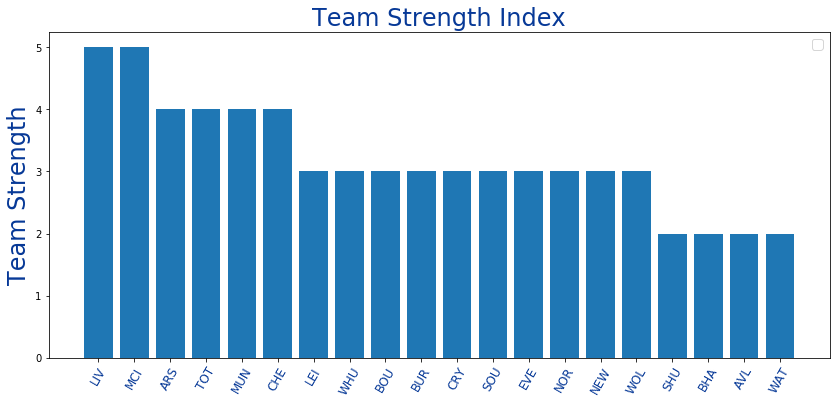

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

sorted_data = sorted(scores.items(), key = lambda x: x[1], reverse = True)

Team = [item[0] for item in sorted_data]
strength = [item[1] for item in sorted_data]

plt.bar(Team, strength)
plt.ylabel('Team Strength', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Team Strength Index', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

In [38]:
schedule_df.columns

Index(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Liverpool',
       'Man City', 'Man Utd', 'Newcastle', 'Norwich', 'Sheffield Utd',
       'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves'],
      dtype='object')

In [39]:
schedule_df.head(10)

,Arsenal,Aston Villa,Bournemouth,Brighton,Burnley,Chelsea,Crystal Palace,Everton,Leicester,Liverpool,Man City,Man Utd,Newcastle,Norwich,Sheffield Utd,Southampton,Spurs,Watford,West Ham,Wolves
Gameweek,,,,,,,,,,,,,,,,,,,,
0,NEW,TOT,SHU,WAT,SOU,MUN,EVE,CRY,WOL,NOR,WHU,CHE,ARS,LIV,BOU,BUR,AVL,BHA,MCI,LEI
1,BUR,BOU,AVL,WHU,ARS,LEI,SHU,WAT,CHE,SOU,TOT,WOL,NOR,NEW,CRY,LIV,MCI,EVE,BHA,MUN
2,LIV,EVE,MCI,SOU,WOL,NOR,MUN,AVL,SHU,ARS,BOU,CRY,TOT,CHE,LEI,BHA,NEW,WHU,WAT,BUR
3,TOT,CRY,LEI,MCI,LIV,SHU,AVL,WOL,BOU,BUR,BHA,SOU,WAT,WHU,CHE,MUN,ARS,NEW,NOR,EVE
4,WAT,WHU,EVE,BUR,BHA,WOL,TOT,BOU,MUN,NEW,NOR,LEI,LIV,MCI,SOU,SHU,CRY,ARS,AVL,CHE
5,AVL,ARS,SOU,NEW,NOR,LIV,WOL,SHU,TOT,CHE,WAT,WHU,BHA,BUR,EVE,BOU,LEI,MCI,MUN,CRY
6,MUN,BUR,WHU,CHE,AVL,BHA,NOR,MCI,NEW,SHU,EVE,ARS,LEI,CRY,LIV,TOT,SOU,WOL,BOU,WAT
7,BOU,NOR,ARS,TOT,EVE,SOU,WHU,BUR,LIV,LEI,WOL,NEW,MUN,AVL,WAT,CHE,BHA,SHU,CRY,MCI
8,SHU,BHA,NOR,AVL,LEI,NEW,MCI,WHU,BUR,MUN,CRY,LIV,CHE,BOU,ARS,WOL,WAT,TOT,EVE,SOU


In [40]:
def avg_FDR(week = gameweek, periods = next_n_games):
    dic = {}
    for team in schedule_df.columns:
        oponents = schedule_df[team][(week-1):(week+periods)]
        avg_FDR = round(sum([scores[oponent] for oponent in oponents])/len(oponents), 2)
        dic[team] = avg_FDR
    return dic

In [41]:
calculate_FDR = avg_FDR()

In [42]:
sorted_FDR = sorted(calculate_FDR.items(), key=lambda x: x[1], reverse=True)

In [43]:
sorted_FDR

[('Man Utd', 4.0),
 ('Crystal Palace', 3.67),
 ('Everton', 3.67),
 ('Leicester', 3.67),
 ('Newcastle', 3.67),
 ('Sheffield Utd', 3.67),
 ('Southampton', 3.67),
 ('Bournemouth', 3.33),
 ('Brighton', 3.33),
 ('Wolves', 3.33),
 ('Arsenal', 3.0),
 ('Liverpool', 3.0),
 ('Man City', 3.0),
 ('Watford', 3.0),
 ('West Ham', 3.0),
 ('Aston Villa', 2.67),
 ('Burnley', 2.67),
 ('Chelsea', 2.67),
 ('Norwich', 2.67),
 ('Spurs', 2.33)]

<function matplotlib.pyplot.show(*args, **kw)>

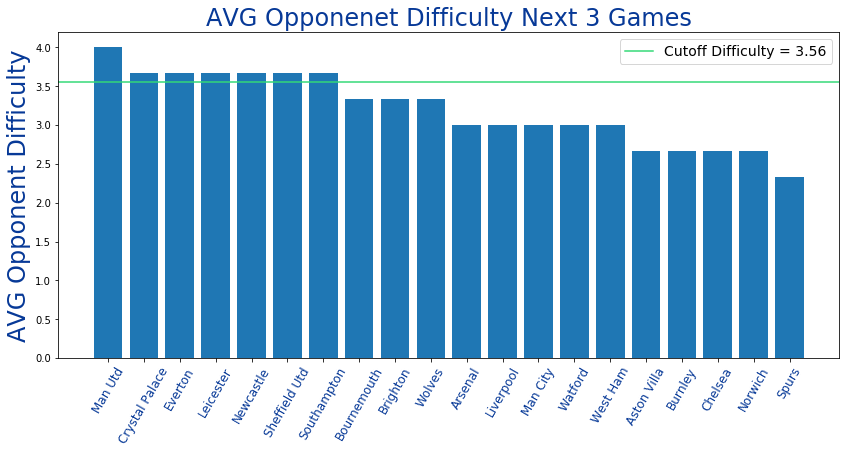

In [44]:
rcParams['figure.figsize'] = 14, 6

Team = [item[0] for item in sorted_FDR]
FDR = [item[1] for item in sorted_FDR]
cutoff = 3.56

plt.bar(Team, FDR)
plt.axhline(y=cutoff, linestyle='-', color='#33D977', label='Cutoff Difficulty = ' + str(cutoff))
plt.ylabel('AVG Opponent Difficulty', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('AVG Opponenet Difficulty Next ' + str(next_n_games +1) + ' Games', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Clean final list of available players by FDR score <= 3.56 and status = 'available'

In [45]:
player_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
383,7,4.4,508,John Lundstram,Defender,5.66,0,7.27,available,49,Sheffield Utd,32,1413018,189369
356,9,7.1,532,Teemu Pukki,Forward,8.61,0,7.18,available,45,Norwich,51,2980001,457233
502,4,5.0,540,Lukasz Fabianski,Goalkeeper,5.16,0,6.20,available,21,West Ham,31,166365,101099
159,9,7.5,403,Tammy Abraham,Forward,9.80,0,5.87,available,8,Chelsea,44,2155006,274785
365,2,5.0,526,Todd Cantwell,Midfielder,4.95,0,5.80,available,45,Norwich,29,1944253,254100


In [46]:
player_df.shape

(541, 14)

In [47]:
clean_df = player_df[player_df.status == 'available']

In [48]:
clean_df.status.value_counts()

available    414
Name: status, dtype: int64

## Remove teams with FDR scores > 3.56 from DF - optional

In [49]:
teams_low_FDR = [key for (key,value) in calculate_FDR.items() if value <= 3.56]

In [50]:
teams_low_FDR

['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Liverpool',
 'Man City',
 'Norwich',
 'Spurs',
 'Watford',
 'West Ham',
 'Wolves']

In [51]:
clean_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
383,7,4.4,508,John Lundstram,Defender,5.66,0,7.27,available,49,Sheffield Utd,32,1413018,189369
356,9,7.1,532,Teemu Pukki,Forward,8.61,0,7.18,available,45,Norwich,51,2980001,457233
502,4,5.0,540,Lukasz Fabianski,Goalkeeper,5.16,0,6.20,available,21,West Ham,31,166365,101099
159,9,7.5,403,Tammy Abraham,Forward,9.80,0,5.87,available,8,Chelsea,44,2155006,274785
365,2,5.0,526,Todd Cantwell,Midfielder,4.95,0,5.80,available,45,Norwich,29,1944253,254100


In [52]:
final_df = clean_df.loc[clean_df.team_name.isin(teams_low_FDR)]

In [53]:
final_df.head(15)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
356,9,7.1,532,Teemu Pukki,Forward,8.61,0,7.18,available,45,Norwich,51,2980001,457233
502,4,5.0,540,Lukasz Fabianski,Goalkeeper,5.16,0,6.20,available,21,West Ham,31,166365,101099
159,9,7.5,403,Tammy Abraham,Forward,9.80,0,5.87,available,8,Chelsea,44,2155006,274785
365,2,5.0,526,Todd Cantwell,Midfielder,4.95,0,5.80,available,45,Norwich,29,1944253,254100
136,3,4.7,540,Erik Pieters,Defender,4.49,0,5.74,available,90,Burnley,27,778819,201753
278,9,9.9,449,Kevin De Bruyne,Midfielder,10.80,0,5.45,available,43,Man City,54,1830290,361764
495,2,4.5,540,Issa Diop,Defender,3.99,0,5.33,available,21,West Ham,24,141605,91295
39,3,5.7,540,John McGinn,Midfielder,4.99,0,5.26,available,7,Aston Villa,30,548152,255400
96,5,4.6,540,Mathew Ryan,Goalkeeper,3.99,0,5.22,available,36,Brighton,24,316493,305183
125,1,4.6,540,Nick Pope,Goalkeeper,3.99,0,5.22,available,90,Burnley,24,656686,168382


In [54]:
clean_players = final_df.to_dict('records')

In [55]:
clean_players[:2]

[{'bonus': 9,
  'cost': 7.1,
  'minutes': 532,
  'name': 'Teemu Pukki',
  'position': 'Forward',
  'pts_per_90min': 8.61,
  'red_cards': 0,
  'roi': 7.18,
  'status': 'available',
  'team_code': 45,
  'team_name': 'Norwich',
  'total_points': 51,
  'transfers_in': 2980001,
  'transfers_out': 457233},
 {'bonus': 4,
  'cost': 5.0,
  'minutes': 540,
  'name': 'Lukasz Fabianski',
  'position': 'Goalkeeper',
  'pts_per_90min': 5.16,
  'red_cards': 0,
  'roi': 6.2,
  'status': 'available',
  'team_code': 21,
  'team_name': 'West Ham',
  'total_points': 31,
  'transfers_in': 166365,
  'transfers_out': 101099}]

## Get list of players by ROI, Total Points and Points Per 90 min

In [56]:
players_roi = sorted(clean_players, key = lambda x: x['roi'], reverse = True)

In [57]:
players_roi[:3]

[{'bonus': 9,
  'cost': 7.1,
  'minutes': 532,
  'name': 'Teemu Pukki',
  'position': 'Forward',
  'pts_per_90min': 8.61,
  'red_cards': 0,
  'roi': 7.18,
  'status': 'available',
  'team_code': 45,
  'team_name': 'Norwich',
  'total_points': 51,
  'transfers_in': 2980001,
  'transfers_out': 457233},
 {'bonus': 4,
  'cost': 5.0,
  'minutes': 540,
  'name': 'Lukasz Fabianski',
  'position': 'Goalkeeper',
  'pts_per_90min': 5.16,
  'red_cards': 0,
  'roi': 6.2,
  'status': 'available',
  'team_code': 21,
  'team_name': 'West Ham',
  'total_points': 31,
  'transfers_in': 166365,
  'transfers_out': 101099},
 {'bonus': 9,
  'cost': 7.5,
  'minutes': 403,
  'name': 'Tammy Abraham',
  'position': 'Forward',
  'pts_per_90min': 9.8,
  'red_cards': 0,
  'roi': 5.87,
  'status': 'available',
  'team_code': 8,
  'team_name': 'Chelsea',
  'total_points': 44,
  'transfers_in': 2155006,
  'transfers_out': 274785}]

### Total Points

In [58]:
players_max_pts = sorted(players_roi, key = lambda x: x['total_points'], reverse = True)

In [59]:
players_max_pts[:3]

[{'bonus': 6,
  'cost': 12.2,
  'minutes': 446,
  'name': 'Sergio Agüero',
  'position': 'Forward',
  'pts_per_90min': 11.07,
  'red_cards': 0,
  'roi': 4.51,
  'status': 'available',
  'team_code': 43,
  'team_name': 'Man City',
  'total_points': 55,
  'transfers_in': 1028618,
  'transfers_out': 370492},
 {'bonus': 9,
  'cost': 9.9,
  'minutes': 449,
  'name': 'Kevin De Bruyne',
  'position': 'Midfielder',
  'pts_per_90min': 10.8,
  'red_cards': 0,
  'roi': 5.45,
  'status': 'available',
  'team_code': 43,
  'team_name': 'Man City',
  'total_points': 54,
  'transfers_in': 1830290,
  'transfers_out': 361764},
 {'bonus': 9,
  'cost': 7.1,
  'minutes': 532,
  'name': 'Teemu Pukki',
  'position': 'Forward',
  'pts_per_90min': 8.61,
  'red_cards': 0,
  'roi': 7.18,
  'status': 'available',
  'team_code': 45,
  'team_name': 'Norwich',
  'total_points': 51,
  'transfers_in': 2980001,
  'transfers_out': 457233}]

### Per 90 mins played

In [60]:
players_90min = sorted(players_roi, key = lambda x: x['pts_per_90min'], reverse = True)

#define filter of minimum time played
min_min = min_min
players_90min = [player for player in players_90min if player['minutes'] >= min_min]

In [61]:
players_90min[:3]

[{'bonus': 6,
  'cost': 12.2,
  'minutes': 446,
  'name': 'Sergio Agüero',
  'position': 'Forward',
  'pts_per_90min': 11.07,
  'red_cards': 0,
  'roi': 4.51,
  'status': 'available',
  'team_code': 43,
  'team_name': 'Man City',
  'total_points': 55,
  'transfers_in': 1028618,
  'transfers_out': 370492},
 {'bonus': 9,
  'cost': 9.9,
  'minutes': 449,
  'name': 'Kevin De Bruyne',
  'position': 'Midfielder',
  'pts_per_90min': 10.8,
  'red_cards': 0,
  'roi': 5.45,
  'status': 'available',
  'team_code': 43,
  'team_name': 'Man City',
  'total_points': 54,
  'transfers_in': 1830290,
  'transfers_out': 361764},
 {'bonus': 3,
  'cost': 8.5,
  'minutes': 308,
  'name': 'Riyad Mahrez',
  'position': 'Midfielder',
  'pts_per_90min': 10.19,
  'red_cards': 0,
  'roi': 4.12,
  'status': 'available',
  'team_code': 43,
  'team_name': 'Man City',
  'total_points': 35,
  'transfers_in': 218287,
  'transfers_out': 225788}]

### Create player lists by position and metric we want to select by

In [62]:
GK_roi = [item for item in players_roi if item['position'] == 'Goalkeeper']
DF_roi = [item for item in players_roi if item['position'] == 'Defender']
MD_roi = [item for item in players_roi if item['position'] == 'Midfielder']
ST_roi = [item for item in players_roi if item['position'] == 'Forward']

In [63]:
GK_pts = [item for item in players_max_pts if item['position'] == 'Goalkeeper']
DF_pts = [item for item in players_max_pts if item['position'] == 'Defender']
MD_pts = [item for item in players_max_pts if item['position'] == 'Midfielder']
ST_pts = [item for item in players_max_pts if item['position'] == 'Forward']

In [64]:
GK_90min = [item for item in players_90min if item['position'] == 'Goalkeeper']
DF_90min = [item for item in players_90min if item['position'] == 'Defender']
MD_90min = [item for item in players_90min if item['position'] == 'Midfielder']
ST_90min = [item for item in players_90min if item['position'] == 'Forward']

## Start by selecting top GKs by ROI

In [65]:
#define money team as empty list and list that tracks count of players selectd per team
money_team = []
players_selected = []
teams_selected = []

#Instantiate initial count per position
#Current players selected for each position
DF_curr = 0
MD_curr = 0 
ST_curr = 0

GK_budget = budget*GK_coef
print(GK_budget)

for item in GK_roi:
    if item['cost'] <= 5.5 and item['cost'] <= GK_budget:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        GK_budget -= item['cost']
        print('Player Selected: ' + item['name'])
        print('GK budget left: ' + str(GK_budget))

print(players_selected)
print(teams_selected)

9.5
Player Selected: Lukasz Fabianski
GK budget left: 4.5
Player Selected: Aaron Ramsdale
GK budget left: 0.0
['Lukasz Fabianski', 'Aaron Ramsdale']
['West Ham', 'Bournemouth']


## Select Top player by points from DF, MD, ST

In [66]:
DF_budget = budget*DF_coef + GK_budget
MD_budget = budget*MD_coef
ST_budget = budget*ST_coef

print(DF_budget, MD_budget, ST_budget)

#Select Top Defender
money_team.append(DF_pts[0])
players_selected.append(DF_pts[0]['name'])
teams_selected.append(DF_pts[0]['team_name'])
DF_budget -= DF_pts[0]['cost']
DF_curr += 1
print('Player Selected: ' + DF_pts[0]['name'])
print('DF budget left: ' + str(DF_budget))

#Select Top Midfielder
money_team.append(MD_pts[0])
players_selected.append(MD_pts[0]['name'])
teams_selected.append(MD_pts[0]['team_name'])
MD_budget -= MD_pts[0]['cost']
MD_curr += 1
print('Player Selected: ' + MD_pts[0]['name'])
print('MD budget left: ' + str(MD_budget))


print(players_selected)
print(teams_selected)

28.499999999999996 36.0 26.0
Player Selected: Trent Alexander-Arnold
DF budget left: 21.4
Player Selected: Kevin De Bruyne
MD budget left: 26.1
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City']


In [67]:
ST_pts[:3]

[{'bonus': 6,
  'cost': 12.2,
  'minutes': 446,
  'name': 'Sergio Agüero',
  'position': 'Forward',
  'pts_per_90min': 11.07,
  'red_cards': 0,
  'roi': 4.51,
  'status': 'available',
  'team_code': 43,
  'team_name': 'Man City',
  'total_points': 55,
  'transfers_in': 1028618,
  'transfers_out': 370492},
 {'bonus': 9,
  'cost': 7.1,
  'minutes': 532,
  'name': 'Teemu Pukki',
  'position': 'Forward',
  'pts_per_90min': 8.61,
  'red_cards': 0,
  'roi': 7.18,
  'status': 'available',
  'team_code': 45,
  'team_name': 'Norwich',
  'total_points': 51,
  'transfers_in': 2980001,
  'transfers_out': 457233},
 {'bonus': 9,
  'cost': 7.5,
  'minutes': 403,
  'name': 'Tammy Abraham',
  'position': 'Forward',
  'pts_per_90min': 9.8,
  'red_cards': 0,
  'roi': 5.87,
  'status': 'available',
  'team_code': 8,
  'team_name': 'Chelsea',
  'total_points': 44,
  'transfers_in': 2155006,
  'transfers_out': 274785}]

In [68]:
#Select Top Striker

for item in ST_pts[:3]:
    if teams_selected.count(item['team_name']) < 3 and len(money_team) == 4:
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
    break

print(len(money_team))
print(players_selected)
print(teams_selected)

Player Selected: Sergio Agüero
ST budget left: 13.8
5
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne', 'Sergio Agüero']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City', 'Man City']


In [69]:
print(DF_curr, MD_curr, ST_curr)

1 1 1


In [70]:
print(DF, MD, ST)

3 4 3


### Fill rest of team with top ROI players

In [71]:
for item in DF_roi:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < DF_budget and DF_curr < DF:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        DF_budget -= item['cost']
        DF_curr += 1
        print('Player Selected: ' + item['name'])
        print('DF budget left: ' + str(DF_budget))
        print('# of DFs selected: ' + str(DF_curr))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and DF_max != DF_curr and item['cost'] <= DF_budget / (DF_max - DF_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            DF_budget -= item['cost']
            DF_curr += 1
            print('Player Selected: ' + item['name'])
            print('DF budget left: ' + str(DF_budget))
            print('# of DFs selected: ' + str(DF_curr))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected)                       

Player Selected: Erik Pieters
DF budget left: 16.7
# of DFs selected: 2
Player Selected: Issa Diop
DF budget left: 12.2
# of DFs selected: 3
Player Selected: Tyrone Mings
DF budget left: 7.6
# of DFs selected: 4
Player Selected: Lewis Dunk
DF budget left: 3.0
# of DFs selected: 5
9
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne', 'Sergio Agüero', 'Erik Pieters', 'Issa Diop', 'Tyrone Mings', 'Lewis Dunk']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City', 'Man City', 'Burnley', 'West Ham', 'Aston Villa', 'Brighton']


## Fill MD position

In [72]:
#move leftover DF budget to MD budget
MD_budget += DF_budget

for item in MD_roi:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < MD_budget and MD_curr < MD:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        MD_budget -= item['cost']
        MD_curr += 1
        print('Player Selected: ' + item['name'])
        print('MD budget left: ' + str(MD_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and MD_max != MD_curr and item['cost'] <= MD_budget / (MD_max - MD_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            MD_budget -= item['cost']
            MD_curr += 1
            print('Player Selected: ' + item['name'])
            print('MD budget left: ' + str(MD_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Todd Cantwell
MD budget left: 24.1
Player Selected: John McGinn
MD budget left: 18.400000000000002
Player Selected: Mason Mount
MD budget left: 11.800000000000002
Player Selected: David Silva
MD budget left: 4.3000000000000025
13
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne', 'Sergio Agüero', 'Erik Pieters', 'Issa Diop', 'Tyrone Mings', 'Lewis Dunk', 'Todd Cantwell', 'John McGinn', 'Mason Mount', 'David Silva']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City', 'Man City', 'Burnley', 'West Ham', 'Aston Villa', 'Brighton', 'Norwich', 'Aston Villa', 'Chelsea', 'Man City']


## Fill ST position

In [73]:
#move leftover MD budget to ST budget
ST_budget += MD_budget

for item in ST_roi:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < ST_budget and ST_curr < ST:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        ST_budget -= item['cost']
        ST_curr += 1
        print('Player Selected: ' + item['name'])
        print('ST budget left: ' + str(ST_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and ST_max != ST_curr and item['cost'] <= ST_budget / (ST_max - ST_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Teemu Pukki
ST budget left: 11.000000000000002
Player Selected: Tammy Abraham
ST budget left: 3.5000000000000018
15
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne', 'Sergio Agüero', 'Erik Pieters', 'Issa Diop', 'Tyrone Mings', 'Lewis Dunk', 'Todd Cantwell', 'John McGinn', 'Mason Mount', 'David Silva', 'Teemu Pukki', 'Tammy Abraham']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City', 'Man City', 'Burnley', 'West Ham', 'Aston Villa', 'Brighton', 'Norwich', 'Aston Villa', 'Chelsea', 'Man City', 'Norwich', 'Chelsea']


In [74]:
money_df = pd.DataFrame(money_team)

In [75]:
money_df

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,4,5.0,540,Lukasz Fabianski,Goalkeeper,5.16,0,6.20,available,21,West Ham,31,166365,101099
1,3,4.5,540,Aaron Ramsdale,Goalkeeper,3.49,0,4.67,available,91,Bournemouth,21,43680,12568
2,2,7.1,540,Trent Alexander-Arnold,Defender,5.16,0,4.37,available,14,Liverpool,31,711826,414015
3,9,9.9,449,Kevin De Bruyne,Midfielder,10.80,0,5.45,available,43,Man City,54,1830290,361764
4,6,12.2,446,Sergio Agüero,Forward,11.07,0,4.51,available,43,Man City,55,1028618,370492
5,3,4.7,540,Erik Pieters,Defender,4.49,0,5.74,available,90,Burnley,27,778819,201753
6,2,4.5,540,Issa Diop,Defender,3.99,0,5.33,available,21,West Ham,24,141605,91295
7,3,4.6,540,Tyrone Mings,Defender,3.66,0,4.78,available,7,Aston Villa,22,375610,112163
8,5,4.6,540,Lewis Dunk,Defender,3.66,0,4.78,available,36,Brighton,22,446039,258292
9,2,5.0,526,Todd Cantwell,Midfielder,4.95,0,5.80,available,45,Norwich,29,1944253,254100


<function matplotlib.pyplot.show(*args, **kw)>

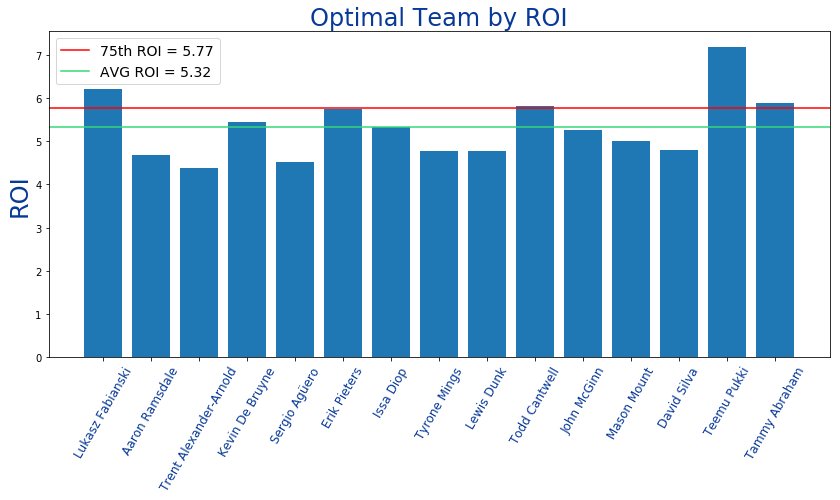

In [76]:
money_x = money_df.roi
money_y = money_df.name
ST_75th = round(money_df.describe().roi['75%'], 2)
ST_AVG = round(money_df.describe().roi['mean'], 2)

plt.bar(money_y, money_x)
plt.axhline(y=ST_75th, color='r', linestyle='-', label='75th ROI = ' + str(ST_75th))
plt.axhline(y=ST_AVG, color='#33D977', linestyle='-', label='AVG ROI = ' + str(ST_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Optimal Team by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

### Top 10 ROI players by position

In [77]:
GK_df = pd.DataFrame(GK_roi)
GK_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,4,5.0,540,Lukasz Fabianski,Goalkeeper,5.16,0,6.20,available,21,West Ham,31,166365,101099
1,5,4.6,540,Mathew Ryan,Goalkeeper,3.99,0,5.22,available,36,Brighton,24,316493,305183
2,1,4.6,540,Nick Pope,Goalkeeper,3.99,0,5.22,available,90,Burnley,24,656686,168382
3,3,4.5,540,Aaron Ramsdale,Goalkeeper,3.49,0,4.67,available,91,Bournemouth,21,43680,12568
4,2,5.1,540,Rui Pedro dos Santos Patrício,Goalkeeper,3.83,0,4.51,available,39,Wolves,23,374785,180269
5,0,4.5,540,Tom Heaton,Goalkeeper,3.33,0,4.44,available,7,Aston Villa,20,176563,140775
6,0,6.1,540,Ederson Santana de Moraes,Goalkeeper,4.16,0,4.10,available,43,Man City,25,578498,410400
7,1,5.0,540,Bernd Leno,Goalkeeper,2.99,0,3.60,available,3,Arsenal,18,209876,198810
8,0,4.6,501,Adrián San Miguel del Castillo,Goalkeeper,2.87,0,3.48,available,14,Liverpool,16,504441,151199
9,0,5.5,450,Hugo Lloris,Goalkeeper,3.79,0,3.45,available,6,Spurs,19,190708,240950


In [78]:
DF_df = pd.DataFrame(DF_roi)
DF_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,3,4.7,540,Erik Pieters,Defender,4.49,0,5.74,available,90,Burnley,27,778819,201753
1,2,4.5,540,Issa Diop,Defender,3.99,0,5.33,available,21,West Ham,24,141605,91295
2,3,4.6,540,Tyrone Mings,Defender,3.66,0,4.78,available,7,Aston Villa,22,375610,112163
3,5,4.6,540,Lewis Dunk,Defender,3.66,0,4.78,available,36,Brighton,22,446039,258292
4,4,4.5,540,Bjorn Engels,Defender,3.33,0,4.44,available,7,Aston Villa,20,75903,22459
5,0,4.5,450,Angelo Ogbonna,Defender,3.99,0,4.44,available,21,West Ham,20,12625,9154
6,2,7.1,540,Trent Alexander-Arnold,Defender,5.16,0,4.37,available,14,Liverpool,31,711826,414015
7,0,5.5,422,Nicolás Otamendi,Defender,5.11,0,4.36,available,43,Man City,24,335933,77290
8,0,4.5,540,Matthew Lowton,Defender,2.99,0,4.00,available,90,Burnley,18,60952,21907
9,3,4.5,336,Arthur Masuaku,Defender,4.81,1,4.00,available,21,West Ham,18,82878,46007


In [79]:
MD_df = pd.DataFrame(MD_roi)
MD_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,2,5.0,526,Todd Cantwell,Midfielder,4.95,0,5.80,available,45,Norwich,29,1944253,254100
1,9,9.9,449,Kevin De Bruyne,Midfielder,10.80,0,5.45,available,43,Man City,54,1830290,361764
2,3,5.7,540,John McGinn,Midfielder,4.99,0,5.26,available,7,Aston Villa,30,548152,255400
3,6,6.6,540,Mason Mount,Midfielder,5.49,0,5.00,available,8,Chelsea,33,2019502,514728
4,3,7.5,404,David Silva,Midfielder,8.00,0,4.80,available,43,Man City,36,574491,271342
5,2,6.1,459,Erik Lamela,Midfielder,5.48,0,4.59,available,6,Spurs,28,424329,157790
6,3,6.0,532,Emiliano Buendía,Midfielder,4.39,0,4.33,available,45,Norwich,26,144423,52728
7,2,7.8,331,Bernardo Mota Veiga de Carvalho e Silva,Midfielder,8.95,0,4.23,available,43,Man City,33,304602,1029773
8,2,4.6,511,Matteo Guendouzi,Midfielder,3.34,0,4.13,available,3,Arsenal,19,514896,253746
9,3,8.5,308,Riyad Mahrez,Midfielder,10.19,0,4.12,available,43,Man City,35,218287,225788


In [80]:
ST_df = pd.DataFrame(ST_roi)
ST_df.head(10)

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,9,7.1,532,Teemu Pukki,Forward,8.61,0,7.18,available,45,Norwich,51,2980001,457233
1,9,7.5,403,Tammy Abraham,Forward,9.80,0,5.87,available,8,Chelsea,44,2155006,274785
2,4,7.8,517,Callum Wilson,Forward,6.95,0,5.13,available,91,Bournemouth,40,270451,706898
3,4,6.6,490,Ashley Barnes,Forward,5.68,0,4.70,available,90,Burnley,31,953578,551343
4,9,9.5,487,Roberto Firmino,Forward,8.11,0,4.63,available,14,Liverpool,44,493031,378368
5,6,12.2,446,Sergio Agüero,Forward,11.07,0,4.51,available,43,Man City,55,1028618,370492
6,4,6.0,517,Wesley Moraes,Forward,4.17,0,4.00,available,7,Aston Villa,24,162287,122364
7,7,11.0,540,Pierre-Emerick Aubameyang,Forward,7.32,0,4.00,available,3,Arsenal,44,572547,764805
8,2,6.3,528,Joshua King,Forward,4.08,0,3.81,available,91,Bournemouth,24,235048,912725
9,5,7.4,450,Sébastien Haller,Forward,5.39,0,3.65,available,21,West Ham,27,409889,325914


## Define Clean df for graphing purposes

In [81]:
clean_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
383,7,4.4,508,John Lundstram,Defender,5.66,0,7.27,available,49,Sheffield Utd,32,1413018,189369
356,9,7.1,532,Teemu Pukki,Forward,8.61,0,7.18,available,45,Norwich,51,2980001,457233
502,4,5.0,540,Lukasz Fabianski,Goalkeeper,5.16,0,6.20,available,21,West Ham,31,166365,101099
159,9,7.5,403,Tammy Abraham,Forward,9.80,0,5.87,available,8,Chelsea,44,2155006,274785
365,2,5.0,526,Todd Cantwell,Midfielder,4.95,0,5.80,available,45,Norwich,29,1944253,254100


In [82]:
graph_roi = []
for row, player in clean_df.iterrows():
    playa = dict(name = player['name'], position = player.position, team=player.team_name, cost = player.cost, points = player.total_points, minutes = player.minutes, ROI = player.roi, pts_per_90min = player.pts_per_90min)
    graph_roi.append(playa)

In [83]:
graph_roi[:3]

[{'name': 'John Lundstram',
  'position': 'Defender',
  'team': 'Sheffield Utd',
  'cost': 4.4,
  'points': 32,
  'minutes': 508,
  'ROI': 7.27,
  'pts_per_90min': 5.66},
 {'name': 'Teemu Pukki',
  'position': 'Forward',
  'team': 'Norwich',
  'cost': 7.1,
  'points': 51,
  'minutes': 532,
  'ROI': 7.18,
  'pts_per_90min': 8.61},
 {'name': 'Lukasz Fabianski',
  'position': 'Goalkeeper',
  'team': 'West Ham',
  'cost': 5.0,
  'points': 31,
  'minutes': 540,
  'ROI': 6.2,
  'pts_per_90min': 5.16}]

### Graph by ROI

In [84]:
GK_graph = clean_df[clean_df['position'] == 'Goalkeeper']
DF_graph = clean_df[clean_df['position'] == 'Defender']
MD_graph = clean_df[clean_df['position'] == 'Midfielder']
ST_graph = clean_df[clean_df['position'] == 'Forward']

### Graph by 90_min Stat

In [85]:
sorted_players_90min = sorted(graph_roi, key = lambda x: x['pts_per_90min'], reverse = True)

#define filter of minimum time played
min_min = min_min
sorted_players_90min = [player for player in sorted_players_90min if player['minutes'] >= min_min]

In [86]:
sorted_players_90min[:3]

[{'name': 'Sergio Agüero',
  'position': 'Forward',
  'team': 'Man City',
  'cost': 12.2,
  'points': 55,
  'minutes': 446,
  'ROI': 4.51,
  'pts_per_90min': 11.07},
 {'name': 'Kevin De Bruyne',
  'position': 'Midfielder',
  'team': 'Man City',
  'cost': 9.9,
  'points': 54,
  'minutes': 449,
  'ROI': 5.45,
  'pts_per_90min': 10.8},
 {'name': 'Riyad Mahrez',
  'position': 'Midfielder',
  'team': 'Man City',
  'cost': 8.5,
  'points': 35,
  'minutes': 308,
  'ROI': 4.12,
  'pts_per_90min': 10.19}]

In [87]:
df_90min = pd.DataFrame(sorted_players_90min)

In [88]:
df_90min.head()

,ROI,cost,minutes,name,points,position,pts_per_90min,team
0,4.51,12.2,446,Sergio Agüero,55,Forward,11.07,Man City
1,5.45,9.9,449,Kevin De Bruyne,54,Midfielder,10.80,Man City
2,4.12,8.5,308,Riyad Mahrez,35,Midfielder,10.19,Man City
3,5.87,7.5,403,Tammy Abraham,44,Forward,9.80,Chelsea
4,4.23,7.8,331,Bernardo Mota Veiga de Carvalho e Silva,33,Midfielder,8.95,Man City


In [89]:
GK_90min_graph = df_90min[df_90min['position'] == 'Goalkeeper']
DF_90min_graph = df_90min[df_90min['position'] == 'Defender']
MD_90min_graph = df_90min[df_90min['position'] == 'Midfielder']
ST_90min_graph = df_90min[df_90min['position'] == 'Forward']

In [90]:
GK_90min_graph.head()

,ROI,cost,minutes,name,points,position,pts_per_90min,team
35,6.20,5.0,540,Lukasz Fabianski,31,Goalkeeper,5.16,West Ham
59,4.64,5.6,540,David de Gea,26,Goalkeeper,4.33,Man Utd
69,5.56,4.5,540,Angus Gunn,25,Goalkeeper,4.16,Southampton
71,4.10,6.1,540,Ederson Santana de Moraes,25,Goalkeeper,4.16,Man City
83,5.33,4.5,540,Dean Henderson,24,Goalkeeper,3.99,Sheffield Utd


In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

## Top 10 Keepers ROI

<function matplotlib.pyplot.show(*args, **kw)>

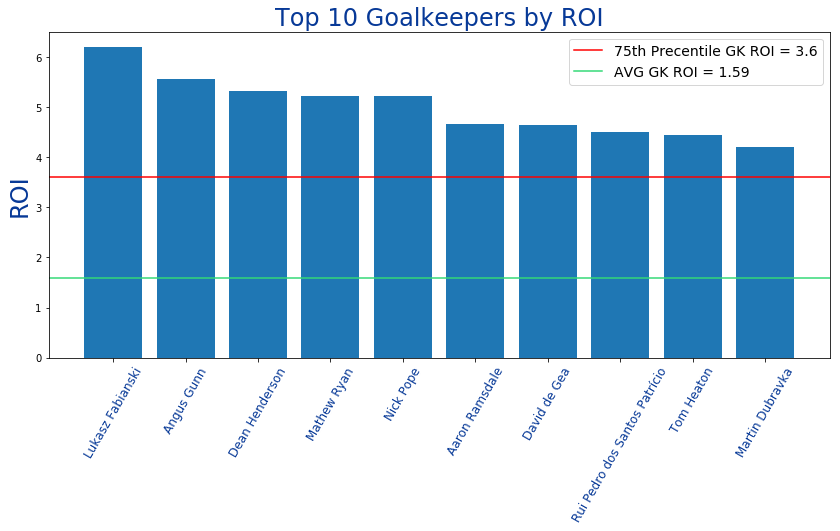

In [92]:
GK_x = GK_graph[:10].roi
GK_y = GK_graph[:10].name
GK_75th = round(GK_graph.describe().roi['75%'], 2)
GK_AVG = round(GK_graph.describe().roi['mean'], 2)

plt.bar(GK_y, GK_x)
plt.axhline(y=GK_75th, color='r', linestyle='-', label='75th Precentile GK ROI = ' + str(GK_75th))
plt.axhline(y=GK_AVG, color='#33D977', linestyle='-', label='AVG GK ROI = ' + str(GK_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Goalkeepers by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Keepers 90_min

<function matplotlib.pyplot.show(*args, **kw)>

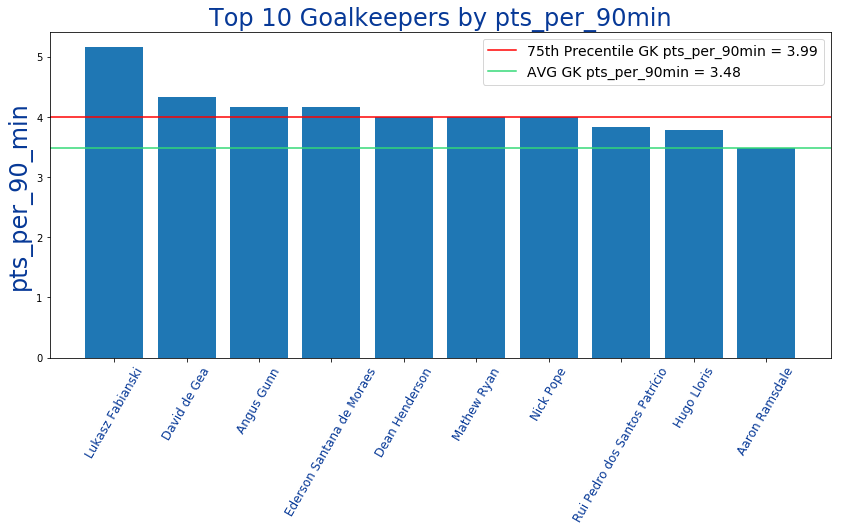

In [93]:
GK_x = GK_90min_graph[:10].pts_per_90min
GK_y = GK_90min_graph[:10].name
GK_75th = round(GK_90min_graph.describe().pts_per_90min['75%'], 2)
GK_AVG = round(GK_90min_graph.describe().pts_per_90min['mean'], 2)

plt.bar(GK_y, GK_x)
plt.axhline(y=GK_75th, color='r', linestyle='-', label='75th Precentile GK pts_per_90min = ' + str(GK_75th))
plt.axhline(y=GK_AVG, color='#33D977', linestyle='-', label='AVG GK pts_per_90min = ' + str(GK_AVG))
plt.ylabel('pts_per_90_min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Goalkeepers by pts_per_90min', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Defenders

<function matplotlib.pyplot.show(*args, **kw)>

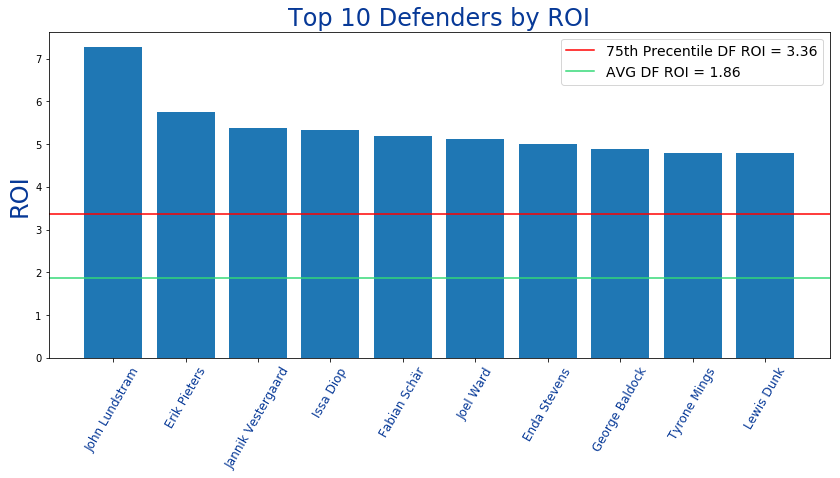

In [94]:
DF_x = DF_graph[:10].roi
DF_y = DF_graph[:10].name
DF_75th = round(DF_graph.describe().roi['75%'], 2)
DF_AVG = round(DF_graph.describe().roi['mean'], 2)

plt.bar(DF_y, DF_x)
plt.axhline(y=DF_75th, color='r', linestyle='-', label='75th Precentile DF ROI = ' + str(DF_75th))
plt.axhline(y=DF_AVG, color='#33D977', linestyle='-', label='AVG DF ROI = ' + str(DF_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Defenders by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Defenders 90min Stat

<function matplotlib.pyplot.show(*args, **kw)>

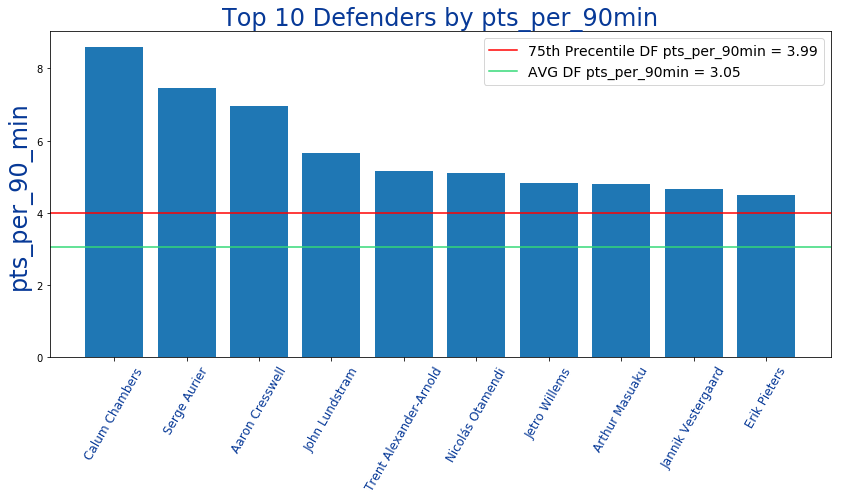

In [95]:
DF_x = DF_90min_graph[:10].pts_per_90min
DF_y = DF_90min_graph[:10].name
DF_75th = round(DF_90min_graph.describe().pts_per_90min['75%'], 2)
DF_AVG = round(DF_90min_graph.describe().pts_per_90min['mean'], 2)

plt.bar(DF_y, DF_x)
plt.axhline(y=DF_75th, color='r', linestyle='-', label='75th Precentile DF pts_per_90min = ' + str(DF_75th))
plt.axhline(y=DF_AVG, color='#33D977', linestyle='-', label='AVG DF pts_per_90min = ' + str(DF_AVG))
plt.ylabel('pts_per_90_min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Defenders by pts_per_90min', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Midfielders

<function matplotlib.pyplot.show(*args, **kw)>

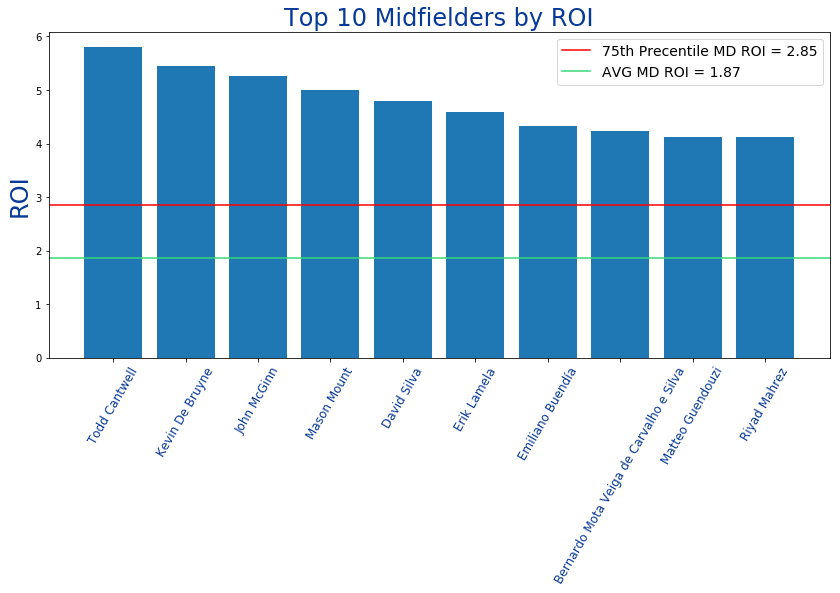

In [96]:
MD_x = MD_graph[:10].roi
MD_y = MD_graph[:10].name
MD_75th = round(MD_graph.describe().roi['75%'], 2)
MD_AVG = round(MD_graph.describe().roi['mean'], 2)

plt.bar(MD_y, MD_x)
plt.axhline(y=MD_75th, color='r', linestyle='-', label='75th Precentile MD ROI = ' + str(MD_75th))
plt.axhline(y=MD_AVG, color='#33D977', linestyle='-', label='AVG MD ROI = ' + str(MD_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Midfielders by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Midfielders 90min Stat

<function matplotlib.pyplot.show(*args, **kw)>

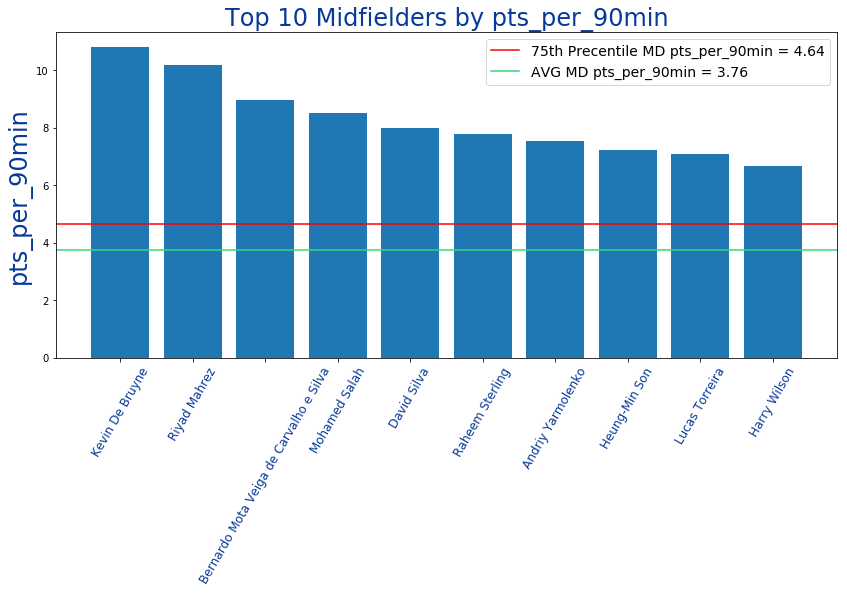

In [97]:
MD_x = MD_90min_graph[:10].pts_per_90min
MD_y = MD_90min_graph[:10].name
MD_75th = round(MD_90min_graph.describe().pts_per_90min['75%'], 2)
MD_AVG = round(MD_90min_graph.describe().pts_per_90min['mean'], 2)

plt.bar(MD_y, MD_x)
plt.axhline(y=MD_75th, color='r', linestyle='-', label='75th Precentile MD pts_per_90min = ' + str(MD_75th))
plt.axhline(y=MD_AVG, color='#33D977', linestyle='-', label='AVG MD pts_per_90min = ' + str(MD_AVG))
plt.ylabel('pts_per_90min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Midfielders by pts_per_90min', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Strikers

<function matplotlib.pyplot.show(*args, **kw)>

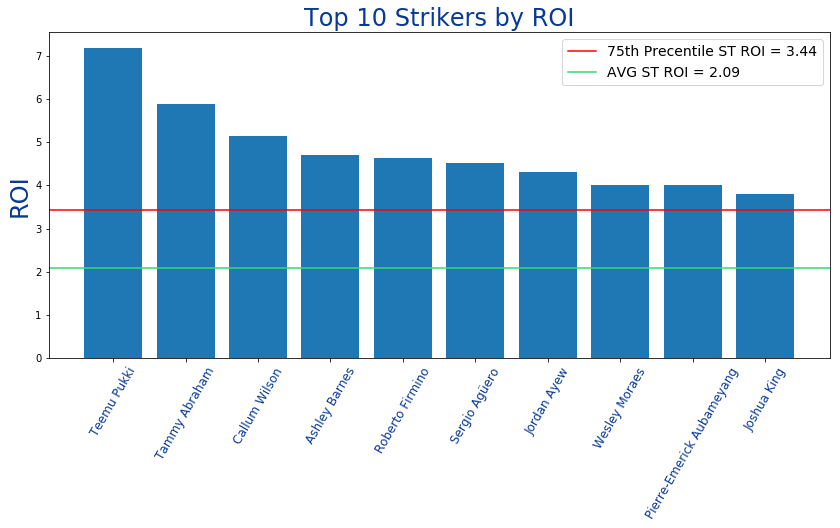

In [98]:
ST_x = ST_graph[:10].roi
ST_y = ST_graph[:10].name
ST_75th = round(ST_graph.describe().roi['75%'], 2)
ST_AVG = round(ST_graph.describe().roi['mean'], 2)

plt.bar(ST_y, ST_x)
plt.axhline(y=ST_75th, color='r', linestyle='-', label='75th Precentile ST ROI = ' + str(ST_75th))
plt.axhline(y=ST_AVG, color='#33D977', linestyle='-', label='AVG ST ROI = ' + str(ST_AVG))
plt.ylabel('ROI', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Strikers by ROI', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

## Top 10 Strikers 90min Stat

<function matplotlib.pyplot.show(*args, **kw)>

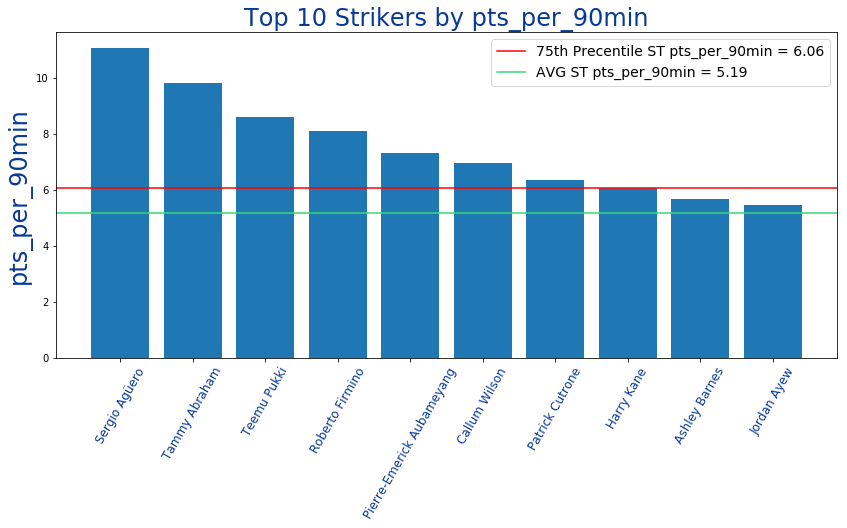

In [99]:
ST_x = ST_90min_graph[:10].pts_per_90min
ST_y = ST_90min_graph[:10].name
ST_75th = round(ST_90min_graph.describe().pts_per_90min['75%'], 2)
ST_AVG = round(ST_90min_graph.describe().pts_per_90min['mean'], 2)

plt.bar(ST_y, ST_x)
plt.axhline(y=ST_75th, color='r', linestyle='-', label='75th Precentile ST pts_per_90min = ' + str(ST_75th))
plt.axhline(y=ST_AVG, color='#33D977', linestyle='-', label='AVG ST pts_per_90min = ' + str(ST_AVG))
plt.ylabel('pts_per_90min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Top 10 Strikers by pts_per_90min', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show

In [100]:
team_df

,code,strength,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,,,
1,14,5,LIV,Liverpool,6,6,0,0,17,5,+12,18
2,43,5,MCI,Man City,6,4,1,1,24,6,+18,13
3,13,3,LEI,Leicester,6,3,1,2,8,5,+3,11
4,3,4,ARS,Arsenal,6,3,1,2,11,10,+1,11
5,21,3,WHU,West Ham,6,3,1,2,8,7,+1,11
6,91,3,BOU,Bournemouth,6,3,2,1,11,10,+1,10
7,6,4,TOT,Spurs,6,2,2,2,12,8,+4,8
8,1,4,MUN,Man Utd,6,2,2,2,8,6,+2,8
9,90,3,BUR,Burnley,6,2,2,2,8,7,+1,8


### Team Stats

In [101]:
teams_stats = team_df.iloc[:,2:12]

In [102]:
teams_stats.GF = [int(item) for item in teams_stats.GF]
teams_stats.GA = [int(item) for item in teams_stats.GA]

In [103]:
teams_stats

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
1,LIV,Liverpool,6,6,0,0,17,5,+12,18
2,MCI,Man City,6,4,1,1,24,6,+18,13
3,LEI,Leicester,6,3,1,2,8,5,+3,11
4,ARS,Arsenal,6,3,1,2,11,10,+1,11
5,WHU,West Ham,6,3,1,2,8,7,+1,11
6,BOU,Bournemouth,6,3,2,1,11,10,+1,10
7,TOT,Spurs,6,2,2,2,12,8,+4,8
8,MUN,Man Utd,6,2,2,2,8,6,+2,8
9,BUR,Burnley,6,2,2,2,8,7,+1,8


### Worst/ Best  Defence vs. Offence

In [104]:
worst_defence_df = teams_stats.sort_values(by = ['GA'], ascending = False)

In [105]:
worst_defence_df.head()

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
20,WAT,Watford,6,0,4,2,4,18,-14,2
16,NOR,Norwich,6,2,4,0,9,14,-5,6
11,CHE,Chelsea,6,2,2,2,12,13,-1,8
19,WOL,Wolves,6,0,2,4,7,11,-4,4
4,ARS,Arsenal,6,3,1,2,11,10,+1,11


In [106]:
best_defence_df = teams_stats.sort_values(by = ['GA'], ascending = True)

In [107]:
best_defence_df.head()

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
1,LIV,Liverpool,6,6,0,0,17,5,+12,18
3,LEI,Leicester,6,3,1,2,8,5,+3,11
8,MUN,Man Utd,6,2,2,2,8,6,+2,8
10,SHU,Sheffield Utd,6,2,2,2,7,6,+1,8
2,MCI,Man City,6,4,1,1,24,6,+18,13


In [144]:
GA = list(zip(worst_defence_df.name, worst_defence_df.GA))
GA_bottom5 = GA[:7]
GA_top5 = sorted(GA[-7:], key = lambda x: x[1])

In [145]:
GA_bottom5, GA_top5

([('Watford', 18),
  ('Norwich', 14),
  ('Chelsea', 13),
  ('Wolves', 11),
  ('Arsenal', 10),
  ('Bournemouth', 10),
  ('Southampton', 9)],
 [('Leicester', 5),
  ('Liverpool', 5),
  ('Man City', 6),
  ('Sheffield Utd', 6),
  ('Man Utd', 6),
  ('West Ham', 7),
  ('Burnley', 7)])

In [146]:
teams_stats.GA.median()

8.0

<function matplotlib.pyplot.show(*args, **kw)>

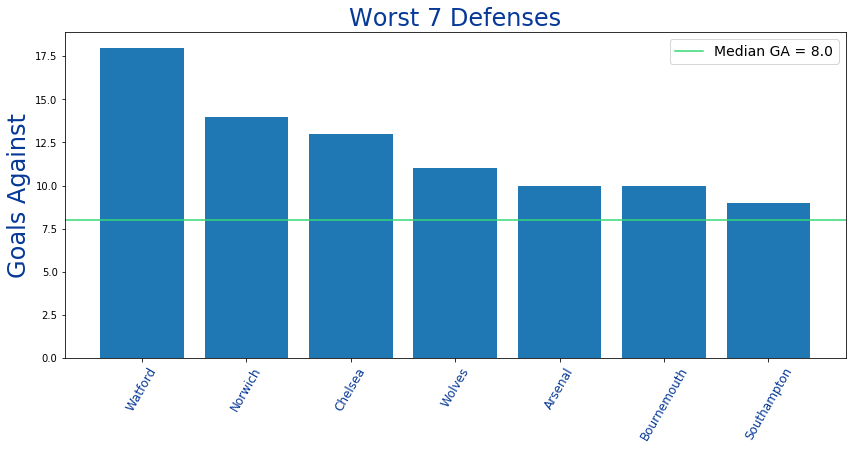

In [147]:
X = [item[0] for item in GA_bottom5]
Y = [int(item[1]) for item in GA_bottom5]

median = teams_stats.GA.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GA = ' + str(median))
plt.ylabel('Goals Against', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Worst 7 Defenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

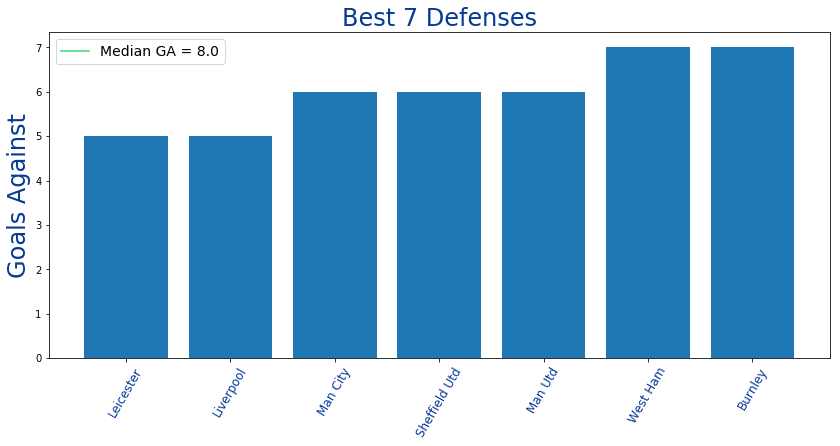

In [148]:
X = [item[0] for item in GA_top5]
Y = [int(item[1]) for item in GA_top5]

median = teams_stats.GA.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GA = ' + str(median))
plt.ylabel('Goals Against', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Best 7 Defenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

In [113]:
offense_df = teams_stats.sort_values(by = ['GF'], ascending = False)

In [114]:
offense_df.head()

,Team,name,Played,W,L,D,GF,GA,GD,Pts
Position,,,,,,,,,,
2,MCI,Man City,6,4,1,1,24,6,+18,13
1,LIV,Liverpool,6,6,0,0,17,5,+12,18
7,TOT,Spurs,6,2,2,2,12,8,+4,8
11,CHE,Chelsea,6,2,2,2,12,13,-1,8
6,BOU,Bournemouth,6,3,2,1,11,10,+1,10


In [149]:
GF = list(zip(offense_df.name, offense_df.GF))
GF_top5 = GF[:7]
GF_bottom5 = GF[-7:]

In [150]:
GF_top5, GF_bottom5

([('Man City', 24),
  ('Liverpool', 17),
  ('Spurs', 12),
  ('Chelsea', 12),
  ('Bournemouth', 11),
  ('Arsenal', 11),
  ('Norwich', 9)],
 [('Southampton', 6),
  ('Aston Villa', 6),
  ('Everton', 5),
  ('Brighton', 5),
  ('Crystal Palace', 4),
  ('Newcastle', 4),
  ('Watford', 4)])

<function matplotlib.pyplot.show(*args, **kw)>

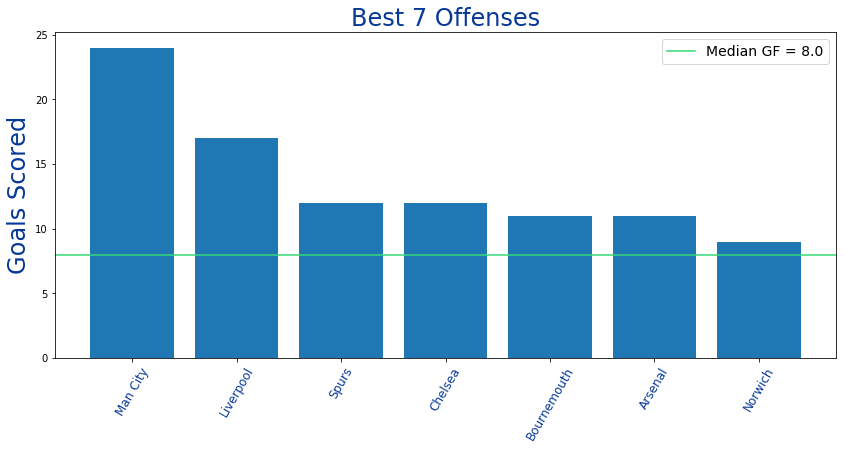

In [151]:
X = [item[0] for item in GF_top5]
Y = [int(item[1]) for item in GF_top5]

median = teams_stats.GF.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GF = ' + str(median))
plt.ylabel('Goals Scored', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Best 7 Offenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

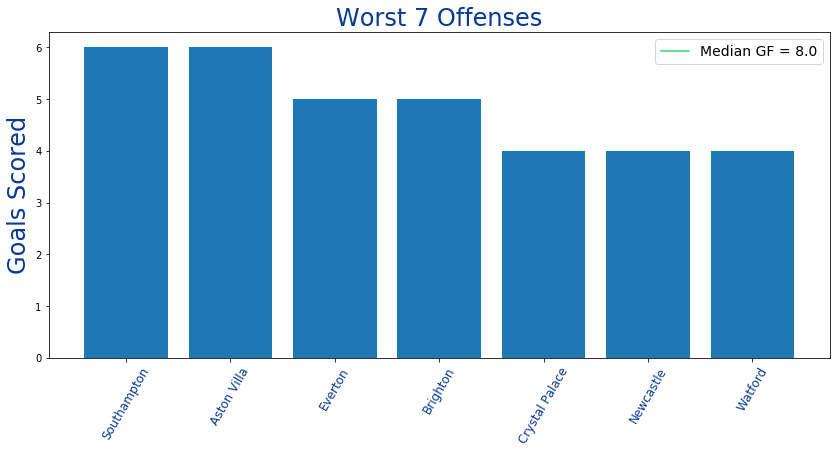

In [152]:
X = [item[0] for item in GF_bottom5]
Y = [int(item[1]) for item in GF_bottom5]

median = teams_stats.GF.median()

plt.bar(X, Y)
plt.ylim(bottom=0)
plt.axhline(y=median, color='#33D977', linestyle='-', label='Median GF = ' + str(median))
plt.ylabel('Goals Scored', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Worst 7 Offenses', fontsize = 24, color = '#073997')
plt.legend(fontsize = 14)
plt.show

In [119]:
stats_df = player_df[player_df.minutes >= min_min]

In [120]:
stats_df.tail()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
352,0,4.4,360,Maximillian Aarons,Defender,0.50,0,0.45,injured,45,Norwich,2,25078,109920
158,0,4.8,453,Kurt Zouma,Defender,0.40,0,0.42,available,8,Chelsea,2,46736,137283
355,0,4.0,270,Grant Hanley,Defender,0.33,0,0.25,available,45,Norwich,1,188038,115464
207,0,5.4,270,Fabian Delph,Defender,0.33,0,0.19,available,11,Everton,1,6503,16351
462,0,4.7,437,José Holebas,Defender,0.00,0,0.00,available,57,Watford,0,11476,165576


### Cobine Team and Player Stats

In [121]:
team_dic = {item:[] for item in team_names}

for row, player in stats_df.iterrows():
    for name in team_names:
        if player.team_name == name:
            playa = dict(name = player['name'], position = player.position, cost = player.cost, minutes = player.minutes, 
                         points = player.total_points,  roi = player.roi, pts_per_90min = player.pts_per_90min, 
                         bonus = player.bonus, red_cards = player.red_cards)
            team_dic[name].append(playa)

In [122]:
stats_df.head()

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
383,7,4.4,508,John Lundstram,Defender,5.66,0,7.27,available,49,Sheffield Utd,32,1413018,189369
356,9,7.1,532,Teemu Pukki,Forward,8.61,0,7.18,available,45,Norwich,51,2980001,457233
502,4,5.0,540,Lukasz Fabianski,Goalkeeper,5.16,0,6.20,available,21,West Ham,31,166365,101099
159,9,7.5,403,Tammy Abraham,Forward,9.80,0,5.87,available,8,Chelsea,44,2155006,274785
365,2,5.0,526,Todd Cantwell,Midfielder,4.95,0,5.80,available,45,Norwich,29,1944253,254100


In [123]:
team_dic['Liverpool']

[{'name': 'Roberto Firmino',
  'position': 'Forward',
  'cost': 9.5,
  'minutes': 487,
  'points': 44,
  'roi': 4.63,
  'pts_per_90min': 8.11,
  'bonus': 9,
  'red_cards': 0},
 {'name': 'Trent Alexander-Arnold',
  'position': 'Defender',
  'cost': 7.1,
  'minutes': 540,
  'points': 31,
  'roi': 4.37,
  'pts_per_90min': 5.16,
  'bonus': 2,
  'red_cards': 0},
 {'name': 'Mohamed Salah',
  'position': 'Midfielder',
  'cost': 12.5,
  'minutes': 528,
  'points': 50,
  'roi': 4.0,
  'pts_per_90min': 8.51,
  'bonus': 7,
  'red_cards': 0},
 {'name': 'Joel Matip',
  'position': 'Defender',
  'cost': 5.5,
  'minutes': 450,
  'points': 21,
  'roi': 3.82,
  'pts_per_90min': 4.19,
  'bonus': 1,
  'red_cards': 0},
 {'name': 'Sadio Mané',
  'position': 'Midfielder',
  'cost': 11.6,
  'minutes': 426,
  'points': 42,
  'roi': 3.62,
  'pts_per_90min': 8.85,
  'bonus': 6,
  'red_cards': 0},
 {'name': 'Andrew Robertson',
  'position': 'Defender',
  'cost': 6.9,
  'minutes': 540,
  'points': 25,
  'roi': 3.

### Get Final Stats per Team using Pandas

In [124]:
team_stats = {item:{} for item in team_names}

for team in team_names:
    active_players = len(stats_df[stats_df.team_name == team].cost)
    tot_cost = round(stats_df[stats_df.team_name == team].cost.sum(), 3)
    tot_pts = round(stats_df[stats_df.team_name == team].total_points.sum(), 3)
    avg_player_roi = round(tot_pts / tot_cost, 3)
    avg_pts_per_player = round(tot_pts / active_players, 3)
    
    stats = dict(active_players = active_players, tot_cost = tot_cost, tot_pts = tot_pts,
               avg_pts_per_player = avg_pts_per_player,  avg_player_roi =  avg_player_roi)
    
    team_stats[team].update(stats)
    
    

In [125]:
team_stats['Newcastle']

{'active_players': 14,
 'tot_cost': 69.4,
 'tot_pts': 214,
 'avg_pts_per_player': 15.286,
 'avg_player_roi': 3.084}

In [126]:
team_stats_df = pd.DataFrame(team_stats).T

In [127]:
team_stats_df.sort_values(by = ['avg_pts_per_player'], ascending = False, inplace = True)

In [128]:
team_stats_df

,active_players,avg_player_roi,avg_pts_per_player,tot_cost,tot_pts
Man City,15.0,3.499,25.400,108.9,381.0
Liverpool,12.0,3.418,24.750,86.9,297.0
Burnley,12.0,3.615,19.250,63.9,231.0
West Ham,14.0,3.500,19.000,76.0,266.0
Leicester,13.0,3.185,18.231,74.4,237.0
Sheffield Utd,13.0,3.569,17.462,63.6,227.0
Aston Villa,14.0,3.248,16.286,70.2,228.0
Spurs,15.0,2.510,16.133,96.4,242.0
Man Utd,15.0,2.659,16.133,91.0,242.0
Brighton,13.0,3.076,15.615,66.0,203.0


### Build a team using 90min Stat

In [129]:
#define money team as empty list and list that tracks count of players selectd per team
money_team = []
players_selected = []
teams_selected = []

#Instantiate initial count per position
#Current players selected for each position
DF_curr = 0
MD_curr = 0 
ST_curr = 0

GK_budget = budget*GK_coef
print(GK_budget)

for item in GK_90min:
    if item['cost'] <= 5.5 and item['cost'] <= GK_budget:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        GK_budget -= item['cost']
        print('Player Selected: ' + item['name'])
        print('GK budget left: ' + str(GK_budget))

print(players_selected)
print(teams_selected)

9.5
Player Selected: Lukasz Fabianski
GK budget left: 4.5
Player Selected: Aaron Ramsdale
GK budget left: 0.0
['Lukasz Fabianski', 'Aaron Ramsdale']
['West Ham', 'Bournemouth']


### Select top 3 players by points per position

In [130]:
DF_budget = budget*DF_coef + GK_budget
MD_budget = budget*MD_coef
ST_budget = budget*ST_coef

print(DF_budget, MD_budget, ST_budget)

#Select Top Defender
money_team.append(DF_pts[0])
players_selected.append(DF_pts[0]['name'])
teams_selected.append(DF_pts[0]['team_name'])
DF_budget -= DF_pts[0]['cost']
DF_curr += 1
print('Player Selected: ' + DF_pts[0]['name'])
print('DF budget left: ' + str(DF_budget))

#Select Top Midfielder
money_team.append(MD_pts[0])
players_selected.append(MD_pts[0]['name'])
teams_selected.append(MD_pts[0]['team_name'])
MD_budget -= MD_pts[0]['cost']
MD_curr += 1
print('Player Selected: ' + MD_pts[0]['name'])
print('MD budget left: ' + str(MD_budget))


print(players_selected)
print(teams_selected)

28.499999999999996 36.0 26.0
Player Selected: Trent Alexander-Arnold
DF budget left: 21.4
Player Selected: Kevin De Bruyne
MD budget left: 26.1
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City']


In [131]:
#Select Top Striker

for item in ST_pts[:3]:
    if teams_selected.count(item['team_name']) < 3 and len(money_team) == 4:
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
    break

print(len(money_team))
print(players_selected)
print(teams_selected)

Player Selected: Sergio Agüero
ST budget left: 13.8
5
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne', 'Sergio Agüero']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City', 'Man City']


In [132]:
print(DF_curr, MD_curr, ST_curr)

1 1 1


In [133]:
print(DF, MD, ST)

3 4 3


### Fill rest of team with 90_min_stats

In [134]:
for item in DF_90min:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < DF_budget and DF_curr < DF:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        DF_budget -= item['cost']
        DF_curr += 1
        print('Player Selected: ' + item['name'])
        print('DF budget left: ' + str(DF_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and DF_max != DF_curr and item['cost'] <= DF_budget / (DF_max - DF_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            DF_budget -= item['cost']
            DF_curr += 1
            print('Player Selected: ' + item['name'])
            print('DF budget left: ' + str(DF_budget))
            print('# of DFs selected: ' + str(DF_curr))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Calum Chambers
DF budget left: 17.0
Player Selected: Serge Aurier
DF budget left: 12.0
Player Selected: Aaron Cresswell
DF budget left: 7.1
# of DFs selected: 4
Player Selected: Nicolás Otamendi
DF budget left: 1.5999999999999996
# of DFs selected: 5
9
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne', 'Sergio Agüero', 'Calum Chambers', 'Serge Aurier', 'Aaron Cresswell', 'Nicolás Otamendi']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City', 'Man City', 'Arsenal', 'Spurs', 'West Ham', 'Man City']


In [135]:
#move leftover DF budget to MD budget
MD_budget += DF_budget

for item in MD_90min:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < MD_budget and MD_curr < MD:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        MD_budget -= item['cost']
        MD_curr += 1
        print('Player Selected: ' + item['name'])
        print('MD budget left: ' + str(MD_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and MD_max != MD_curr and item['cost'] <= MD_budget / (MD_max - MD_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            MD_budget -= item['cost']
            MD_curr += 1
            print('Player Selected: ' + item['name'])
            print('MD budget left: ' + str(MD_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Mohamed Salah
MD budget left: 15.200000000000003
Player Selected: Andriy Yarmolenko
MD budget left: 9.300000000000002
Player Selected: Lucas Torreira
MD budget left: 4.400000000000002
Player Selected: Marvelous Nakamba
MD budget left: 1.7763568394002505e-15
13
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne', 'Sergio Agüero', 'Calum Chambers', 'Serge Aurier', 'Aaron Cresswell', 'Nicolás Otamendi', 'Mohamed Salah', 'Andriy Yarmolenko', 'Lucas Torreira', 'Marvelous Nakamba']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City', 'Man City', 'Arsenal', 'Spurs', 'West Ham', 'Man City', 'Liverpool', 'West Ham', 'Arsenal', 'Aston Villa']


In [136]:
#move leftover MD budget to ST budget
ST_budget += MD_budget

for item in ST_90min:
    if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and item['cost'] < ST_budget and ST_curr < ST:
        money_team.append(item)
        players_selected.append(item['name'])
        teams_selected.append(item['team_name'])
        ST_budget -= item['cost']
        ST_curr += 1
        print('Player Selected: ' + item['name'])
        print('ST budget left: ' + str(ST_budget))
    else:
        if teams_selected.count(item['team_name']) < 3 and item['name'] not in players_selected and ST_max != ST_curr and item['cost'] <= ST_budget / (ST_max - ST_curr):
            money_team.append(item)
            players_selected.append(item['name'])
            teams_selected.append(item['team_name'])
            ST_budget -= item['cost']
            ST_curr += 1
            print('Player Selected: ' + item['name'])
            print('ST budget left: ' + str(ST_budget))
            
            
print(len(money_team))
print(players_selected)
print(teams_selected) 

Player Selected: Tammy Abraham
ST budget left: 6.3000000000000025
Player Selected: Patrick Cutrone
ST budget left: 0.5000000000000027
15
['Lukasz Fabianski', 'Aaron Ramsdale', 'Trent Alexander-Arnold', 'Kevin De Bruyne', 'Sergio Agüero', 'Calum Chambers', 'Serge Aurier', 'Aaron Cresswell', 'Nicolás Otamendi', 'Mohamed Salah', 'Andriy Yarmolenko', 'Lucas Torreira', 'Marvelous Nakamba', 'Tammy Abraham', 'Patrick Cutrone']
['West Ham', 'Bournemouth', 'Liverpool', 'Man City', 'Man City', 'Arsenal', 'Spurs', 'West Ham', 'Man City', 'Liverpool', 'West Ham', 'Arsenal', 'Aston Villa', 'Chelsea', 'Wolves']


In [137]:
money_df = pd.DataFrame(money_team)

In [138]:
money_df

,bonus,cost,minutes,name,position,pts_per_90min,red_cards,roi,status,team_code,team_name,total_points,transfers_in,transfers_out
0,4,5.0,540,Lukasz Fabianski,Goalkeeper,5.16,0,6.20,available,21,West Ham,31,166365,101099
1,3,4.5,540,Aaron Ramsdale,Goalkeeper,3.49,0,4.67,available,91,Bournemouth,21,43680,12568
2,2,7.1,540,Trent Alexander-Arnold,Defender,5.16,0,4.37,available,14,Liverpool,31,711826,414015
3,9,9.9,449,Kevin De Bruyne,Midfielder,10.80,0,5.45,available,43,Man City,54,1830290,361764
4,6,12.2,446,Sergio Agüero,Forward,11.07,0,4.51,available,43,Man City,55,1028618,370492
5,0,4.4,135,Calum Chambers,Defender,8.60,0,2.95,available,3,Arsenal,13,39239,45407
6,2,5.0,180,Serge Aurier,Defender,7.46,0,3.00,available,6,Spurs,15,195351,34048
7,2,4.9,180,Aaron Cresswell,Defender,6.96,0,2.86,available,21,West Ham,14,22519,15822
8,0,5.5,422,Nicolás Otamendi,Defender,5.11,0,4.36,available,43,Man City,24,335933,77290
9,7,12.5,528,Mohamed Salah,Midfielder,8.51,0,4.00,available,14,Liverpool,50,753676,758490


<function matplotlib.pyplot.show(*args, **kw)>

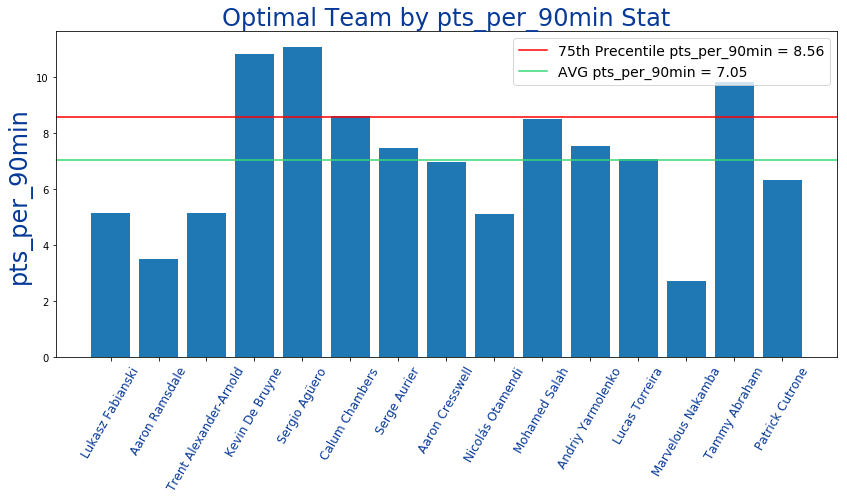

In [139]:
money_x = money_df.pts_per_90min
money_y = money_df.name
ST_75th = round(money_df.describe().pts_per_90min['75%'], 2)
ST_AVG = round(money_df.describe().pts_per_90min['mean'], 2)

plt.bar(money_y, money_x)
plt.axhline(y=ST_75th, color='r', linestyle='-', label='75th Precentile pts_per_90min = ' + str(ST_75th))
plt.axhline(y=ST_AVG, color='#33D977', linestyle='-', label='AVG pts_per_90min = ' + str(ST_AVG))
plt.ylabel('pts_per_90min', fontsize = 24, color = '#073997')
plt.xticks(rotation=60, fontsize = 12, color = '#073997')
plt.title('Optimal Team by pts_per_90min Stat', fontsize = 24, color = '#073997')
plt.legend( fontsize = 14)
plt.show